<a href="https://colab.research.google.com/github/mmburu8/VERIFY-QUALFIED-LEADS/blob/main/SECRET_TS_COMPLIANCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING LIBRARIES AND DATASETS

In [1]:
# install package
! pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 80 kB 4.8 MB/s 


In [2]:
# IMPORT LIBRARIES
import pandas as pd
from collections import defaultdict
import numpy as np
import math
import re

In [4]:
# import datasets
leads = pd.read_csv("TracyJan.csv")

# DATA CLEANING AND MANIPULATION


In [5]:
# creating a copy
trueleads =  leads.copy()
trueleads.head()

,First Name,Last Name,Phone,Email,Resort,Want out?,Mortgage Amount,Annual Maintenance Fee,Time Received,KEY,PersonID,Person Status,IP Adress
0,Tammy,Moore,7708337247,mstammydc@gmail.com,Holiday Inn Resorts,NaN,"$10,001 - $20,000",$500 - $999,01/01/2022 03:59,6,1279770854,Do Not Call,NaN
1,Crystal,Apodaca,5756444298,capod1983@gmail.com,NaN,NaN,No Mortgage,"$2,000+",01/01/2022 06:55,8,1279771113,Wrong Number,NaN
2,Rita,Haxton,6054156847,rkhax@aol.com,Diamond,NaN,No Mortgage,"$2,000+",01/01/2022 08:30,6,1279771246,Not Interested,NaN
3,Alicia,Salinas,7372670827,lovesalinas22@gmail.com,NaN,NaN,No Mortgage,"$1,000 - $1,499",01/01/2022 08:40,7,1279771265,NQ - No Timeshare,NaN
4,Tinamarie,Mettin,4024156116,snickerstms@gmail.com,TinaMarie Mettin,NaN,"$1 - $10,000",$500 - $999,01/01/2022 08:44,6,1279771267,Not Interested,NaN


In [6]:
#number of missing values in each column
trueleads.isnull().sum()

First Name                   0
Last Name                    0
Phone                        0
Email                        0
Resort                      21
Want out?                 1312
Mortgage Amount              4
Annual Maintenance Fee       1
Time Received                0
KEY                          0
PersonID                     0
Person Status               83
IP Adress                 1312
dtype: int64

In [7]:
# datatype of every column
trueleads.dtypes

First Name                 object
Last Name                  object
Phone                       int64
Email                      object
Resort                     object
Want out?                 float64
Mortgage Amount            object
Annual Maintenance Fee     object
Time Received              object
KEY                         int64
PersonID                    int64
Person Status              object
IP Adress                 float64
dtype: object

In [8]:
print(trueleads["Person Status"].unique())

['Do Not Call' 'Wrong Number' 'Not Interested' 'NQ - No Timeshare'
 'No Answer' 'Disconnected' 'Survey Completed' "NQ - Can't Afford"
 'NQ - PIF Low MF' nan 'NQ - Developer Issue' 'Call Back'
 'Appointment Set' 'NQ - In Collections' 'Vetting Scheduled'
 'Won - Lead Transferred' 'NQ - No Misreps / Presentation' 'Left Message'
 'Deal Created' 'Deal Lost' 'Not Available' 'Appointment Attended']


In [ ]:
trueleads.dtypes

First Name                 object
Last Name                  object
Phone                       int64
Email                      object
Resort                     object
Want out?                 float64
Mortgage Amount            object
Annual Maintenance Fee     object
Time Received              object
KEY                         int64
PersonID                    int64
Person Status              object
IP Adress                 float64
target                     object
dtype: object

In [9]:
# duplicates
trueleads["Phone"] = trueleads["Phone"].astype(str)
duplicate = trueleads[trueleads.duplicated("Phone")]
duplicate

,First Name,Last Name,Phone,Email,Resort,Want out?,Mortgage Amount,Annual Maintenance Fee,Time Received,KEY,PersonID,Person Status,IP Adress
224,Maggie,Rush,8595821691,mrush56@gmail.com,Diamond Resorts,NaN,"$10,001 - $20,000",$500 - $999,06/01/2022 05:16,2,1279852164,NaN,NaN
234,Thomas,Yoder,9087239988,tby72@verizon.net,Hilton Grand Vacations,NaN,No Mortgage,"$1,500 - 1,999",06/01/2022 08:26,7,1279860642,NQ - Developer Issue,NaN
299,Lydia,Sierra,3475313945,13801234@gmsil.com,Wyndham,NaN,"$20,001 - $30,000",Under $500,07/01/2022 11:01,3,1279871784,NaN,NaN
361,Judy,Williams,8595821691,judy.cornelius50@yahoo.com,Westgate,NaN,"$1 - $10,000","$1,000 - $1,499",08/01/2022 15:31,2,1279925121,No Answer,NaN
438,Robert,Robert,3103513150,ichibob1000@gmail.com,diamond,NaN,No Mortgage,"$1,000 - $1,499",10/01/2022 06:28,2,1279936962,No Answer,NaN
439,Jacqueline,Johnson,5016583193,jackikjohnson55@gmail.com,Holiday inn,NaN,"$30,001 - $40,000","$1,000 - $1,499",10/01/2022 06:39,3,1279937136,NaN,NaN
498,Earnest,Tomas,2524683661,horsetrainer1953@aol.com,Wyndham,NaN,"$10,001 - $20,000","$1,000 - $1,499",11/01/2022 11:23,8,1279938089,Disconnected,NaN
605,Thelma,Paige,2404013043,tdeneal@hotmail.com,Westgate,NaN,"$1 - $10,000",$500 - $999,13/01/2022 14:27,2,1280042788,No Answer,NaN
761,Duane,Dilzer,8189232734,duanedilzer@gmail.com,Marriott,NaN,no mortgage,"$1,000 - $1,499",16/01/2022 18:15,2,1280087990,NaN,NaN
883,Dawn,Smith,2034176061,dawns0466@gmail.com,Liki Tiki Village,NaN,No Mortgage,"$1,000 - $1,499",20/01/2022 07:57,2,1280157866,NaN,NaN


In [10]:
print(trueleads.shape)

(1312, 13)


#**FEATURE ENGINEERING**

**CREATE NEW COLUMN STATE LIVING IN**

In [11]:
# convert float datatype to integer datatype
trueleads["Phone"] = trueleads["Phone"].astype(int)
trueleads.head()

,First Name,Last Name,Phone,Email,Resort,Want out?,Mortgage Amount,Annual Maintenance Fee,Time Received,KEY,PersonID,Person Status,IP Adress
0,Tammy,Moore,7708337247,mstammydc@gmail.com,Holiday Inn Resorts,NaN,"$10,001 - $20,000",$500 - $999,01/01/2022 03:59,6,1279770854,Do Not Call,NaN
1,Crystal,Apodaca,5756444298,capod1983@gmail.com,NaN,NaN,No Mortgage,"$2,000+",01/01/2022 06:55,8,1279771113,Wrong Number,NaN
2,Rita,Haxton,6054156847,rkhax@aol.com,Diamond,NaN,No Mortgage,"$2,000+",01/01/2022 08:30,6,1279771246,Not Interested,NaN
3,Alicia,Salinas,7372670827,lovesalinas22@gmail.com,NaN,NaN,No Mortgage,"$1,000 - $1,499",01/01/2022 08:40,7,1279771265,NQ - No Timeshare,NaN
4,Tinamarie,Mettin,4024156116,snickerstms@gmail.com,TinaMarie Mettin,NaN,"$1 - $10,000",$500 - $999,01/01/2022 08:44,6,1279771267,Not Interested,NaN


In [12]:
# split the values by 3rd index
nambariSimu = []
telephone = list(trueleads["Phone"])
for t in telephone:
  tl = str(t)
  tl = tl[:3]
  nambariSimu.append(int(tl))
print(nambariSimu)

[770, 575, 605, 737, 402, 516, 970, 585, 773, 803, 310, 631, 619, 817, 517, 315, 740, 863, 910, 210, 951, 315, 801, 818, 267, 713, 678, 240, 818, 210, 612, 202, 618, 609, 707, 626, 832, 770, 330, 660, 386, 630, 318, 661, 707, 435, 847, 859, 516, 925, 954, 413, 225, 334, 315, 702, 908, 209, 215, 805, 651, 425, 661, 240, 955, 845, 708, 606, 626, 904, 302, 315, 812, 910, 904, 301, 540, 757, 310, 510, 603, 540, 770, 845, 570, 252, 417, 225, 313, 832, 406, 727, 228, 951, 919, 609, 206, 282, 706, 626, 323, 703, 626, 718, 281, 929, 313, 787, 575, 774, 336, 757, 843, 813, 908, 215, 210, 203, 434, 205, 919, 252, 801, 212, 832, 910, 813, 210, 480, 517, 972, 954, 413, 323, 248, 336, 215, 347, 641, 813, 909, 832, 402, 706, 631, 707, 847, 573, 330, 513, 305, 859, 518, 386, 520, 404, 254, 619, 714, 863, 803, 609, 954, 985, 708, 267, 757, 562, 732, 201, 314, 337, 478, 440, 228, 708, 573, 312, 850, 585, 937, 732, 304, 803, 708, 923, 251, 347, 620, 954, 928, 425, 804, 678, 414, 818, 615, 718, 541, 614,

In [13]:
# unique values in nambariSimu List
from collections import defaultdict
res = defaultdict(list)
for ele in nambariSimu:
  res[ele].append(ele)
uniqueNumero = list(res.keys())
print(len(uniqueNumero))
uniqueNumero

273


[770,
 575,
 605,
 737,
 402,
 516,
 970,
 585,
 773,
 803,
 310,
 631,
 619,
 817,
 517,
 315,
 740,
 863,
 910,
 210,
 951,
 801,
 818,
 267,
 713,
 678,
 240,
 612,
 202,
 618,
 609,
 707,
 626,
 832,
 330,
 660,
 386,
 630,
 318,
 661,
 435,
 847,
 859,
 925,
 954,
 413,
 225,
 334,
 702,
 908,
 209,
 215,
 805,
 651,
 425,
 955,
 845,
 708,
 606,
 904,
 302,
 812,
 301,
 540,
 757,
 510,
 603,
 570,
 252,
 417,
 313,
 406,
 727,
 228,
 919,
 206,
 282,
 706,
 323,
 703,
 718,
 281,
 929,
 787,
 774,
 336,
 843,
 813,
 203,
 434,
 205,
 212,
 480,
 972,
 248,
 347,
 641,
 909,
 573,
 513,
 305,
 518,
 520,
 404,
 254,
 714,
 985,
 562,
 732,
 201,
 314,
 337,
 478,
 440,
 312,
 850,
 937,
 304,
 923,
 251,
 620,
 928,
 804,
 414,
 615,
 541,
 614,
 309,
 704,
 405,
 415,
 502,
 808,
 917,
 973,
 352,
 720,
 931,
 219,
 772,
 256,
 860,
 307,
 412,
 662,
 949,
 864,
 269,
 512,
 785,
 602,
 561,
 980,
 646,
 682,
 501,
 636,
 862,
 407,
 775,
 317,
 408,
 216,
 916,
 830,
 508,
 559

In [14]:
# dictionary with area code and state
UsAreaCode = {
    "Alabama": [480, 520, 602, 623, 928],
    "Alaska": [907],
    "Arizona": [480, 520, 602, 623, 928],
    "Arkansas": [479, 501, 870],
    "California": [209, 213, 279, 310, 323, 341, 408, 415, 424, 442, 510, 530, 559, 562, 619, 626, 628, 650, 657, 661, 669, 707, 714, 747, 760, 805, 818, 820, 831, 858, 909, 916, 925, 949, 951],
    "Colorado": [303, 719, 720, 970],
    "Conneticut": [203, 475, 860, 959],
    "Delawere": [302],
    "Florida": [239, 305, 321, 352, 386, 407, 561, 689, 727, 754, 772, 786, 813, 850, 863, 904, 941, 954],
    "Georgia": [229, 404, 470, 478, 678, 706, 762, 770, 912],
    "Hawaii": [808],
    "Idaho": [208, 986],
    "Illinois": [217, 224, 309, 312, 331, 618, 630, 708, 773, 779, 815, 847, 872],
    "Indiana": [219, 260, 317, 463, 574, 765, 812, 930],
    "Iowa": [319, 515, 563, 641, 712],
    "Kansas": [316, 620, 785, 913],
    "Kentucky": [270, 364, 502, 606, 859],
    "Louisiana": [225, 318, 337, 504, 985],
    "Maine": [207],
    "Maryland": [227, 240, 301, 410, 443, 667],
    "Massachausetts": [339, 351, 413, 508, 617, 774, 781, 857, 978],
    "Michigan": [231, 248, 269, 313, 517, 586, 616, 734, 810, 906, 947, 989],
    "Minnesota": [218, 320, 507, 612, 651, 763, 952],
    "Mississippi": [228, 601, 662, 769],
    "Missouri": [314, 417, 573, 636, 660, 816],
    "Montana": [406],
    "Nebraska": [308, 402, 531],
    "Nevada": [702, 725, 775],
    "New Hampshire": [603],
    "New Jersey": [201, 551, 609, 640, 732, 848, 856, 862, 908, 973],
    "New Mexico": [505, 575],
    "New York": [212, 315, 332, 347, 516, 518, 585, 607, 631, 646, 680, 716, 718, 838, 845, 914, 917, 929, 934],
    "North Carolina": [252, 336, 704, 743, 828, 910, 919, 980, 984],
    "North Dakota": [701],
    "Ohio": [216, 220, 234, 283, 326, 330, 380, 419, 440, 513, 567, 614, 740, 937],
    "Oklahoma": [405, 539, 572, 580, 918],
    "Oregon": [458, 503, 541, 971],
    "Pennsylvania": [215, 223, 267, 272, 412, 445, 484, 570, 610, 717, 724, 814, 878],
    "Rhode Island": [401],
    "South Carolina": [803, 839, 843, 854, 864],
    "South Dakota": [605],
    "Tennessee": [423, 615, 629, 731, 865, 901, 931],
    "Texas": [210, 214, 254, 281, 325, 346, 361, 409, 430, 432, 469, 512, 682, 713, 726, 737, 806, 817, 830, 832, 903, 915, 936, 940, 956, 972, 979],
    "Utah": [385, 435, 801],
    "Vermont": [802],
    "Virginia": [276, 434, 540, 571, 703, 757, 804],
    "Washington": [206, 253, 360, 425, 509, 564],
    "Washington DC": [202],
    "West Virginia": [304, 681],
    "Wisconsin": [262, 414, 534, 608, 715, 920],
    "Wyoming": [307],
    "American Samoa": [684],
    "Guam": [671],
    "Marianas Island": [670],
    "Puerto Rico": [787, 939],
    "US Virgin Islands": [340]
}

In [15]:
# list of states in the USAreaCode dictionary
states = list(UsAreaCode.keys())
print(states)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Conneticut', 'Delawere', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachausetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin', 'Wyoming', 'American Samoa', 'Guam', 'Marianas Island', 'Puerto Rico', 'US Virgin Islands']


In [16]:
print(len(states))

56


In [18]:
# GET THE STATES THE LEADS LIVE IN
Nyumbani = []
for num in nambariSimu:
  # loops over phone numbers in the nambariSimu list
  for st in states:
    # loops over states to acquire key for the dictionary
    if num in UsAreaCode[st]:
      # if number is in list of key that is its state
      Home = st
    #else:
      #continue
  Nyumbani.append(Home)
print(len(Nyumbani))

1312


In [19]:
# form a column for the states
trueleads["StateLivingIn"] = Nyumbani
trueleads.head()

,First Name,Last Name,Phone,Email,Resort,Want out?,Mortgage Amount,Annual Maintenance Fee,Time Received,KEY,PersonID,Person Status,IP Adress,StateLivingIn
0,Tammy,Moore,7708337247,mstammydc@gmail.com,Holiday Inn Resorts,NaN,"$10,001 - $20,000",$500 - $999,01/01/2022 03:59,6,1279770854,Do Not Call,NaN,Georgia
1,Crystal,Apodaca,5756444298,capod1983@gmail.com,NaN,NaN,No Mortgage,"$2,000+",01/01/2022 06:55,8,1279771113,Wrong Number,NaN,New Mexico
2,Rita,Haxton,6054156847,rkhax@aol.com,Diamond,NaN,No Mortgage,"$2,000+",01/01/2022 08:30,6,1279771246,Not Interested,NaN,South Dakota
3,Alicia,Salinas,7372670827,lovesalinas22@gmail.com,NaN,NaN,No Mortgage,"$1,000 - $1,499",01/01/2022 08:40,7,1279771265,NQ - No Timeshare,NaN,Texas
4,Tinamarie,Mettin,4024156116,snickerstms@gmail.com,TinaMarie Mettin,NaN,"$1 - $10,000",$500 - $999,01/01/2022 08:44,6,1279771267,Not Interested,NaN,Nebraska


**CREATE A COLUMN DESCRIBING THE DOMAIN**

In [20]:
# splitting columns
test = "mstammydc@gmail.com"
# split column on @ character
wassup = re.split("@", test)
# take the last element in the list
print(wassup[-1])

gmail.com


In [21]:
# place email in a list
email = list(trueleads["Email"])
# create empty list that will act as output
emailCo = []
# split email on @ character
for em in email:
  wassup = re.split("@", em)
  # add wassup to list
  emailCo.append(wassup[-1])
print(len(emailCo))

1312


In [24]:
# add list as column in dataset
trueleads["emailCompany"] = emailCo

In [25]:
# get number of unique values in column StateLivingIn
print(len(trueleads["StateLivingIn"].unique()))

51


In [26]:
# show first 5 rows
trueleads.head()

,First Name,Last Name,Phone,Email,Resort,Want out?,Mortgage Amount,Annual Maintenance Fee,Time Received,KEY,PersonID,Person Status,IP Adress,StateLivingIn,emailCompany
0,Tammy,Moore,7708337247,mstammydc@gmail.com,Holiday Inn Resorts,NaN,"$10,001 - $20,000",$500 - $999,01/01/2022 03:59,6,1279770854,Do Not Call,NaN,Georgia,gmail.com
1,Crystal,Apodaca,5756444298,capod1983@gmail.com,NaN,NaN,No Mortgage,"$2,000+",01/01/2022 06:55,8,1279771113,Wrong Number,NaN,New Mexico,gmail.com
2,Rita,Haxton,6054156847,rkhax@aol.com,Diamond,NaN,No Mortgage,"$2,000+",01/01/2022 08:30,6,1279771246,Not Interested,NaN,South Dakota,aol.com
3,Alicia,Salinas,7372670827,lovesalinas22@gmail.com,NaN,NaN,No Mortgage,"$1,000 - $1,499",01/01/2022 08:40,7,1279771265,NQ - No Timeshare,NaN,Texas,gmail.com
4,Tinamarie,Mettin,4024156116,snickerstms@gmail.com,TinaMarie Mettin,NaN,"$1 - $10,000",$500 - $999,01/01/2022 08:44,6,1279771267,Not Interested,NaN,Nebraska,gmail.com


**EXPAND TIME RECEIVED COLUMN**

In [27]:
# look at the datatype of TimeReceived column
print(type(trueleads["Time Received"][1]))

<class 'str'>


In [28]:
# convert Time Received column from string datatype to datetime datatype
# convert dattime from 12 hour to 24 hour system
trueleads["Time Received"] = pd.to_datetime(trueleads["Time Received"]).dt.strftime("%d %m %Y, %H:%M")
trueleads["Time Received"] = pd.to_datetime(trueleads["Time Received"])
trueleads["Time Received"]

0      2022-01-01 03:59:00
1      2022-01-01 06:55:00
2      2022-01-01 08:30:00
3      2022-01-01 08:40:00
4      2022-01-01 08:44:00
               ...        
1307   2022-01-31 16:43:00
1308   2022-01-31 17:05:00
1309   2022-01-31 17:50:00
1310   2022-01-31 19:00:00
1311   2022-01-31 20:48:00
Name: Time Received, Length: 1312, dtype: datetime64[ns]

In [29]:
# separate datetime column into day, month, hour and minute
trueleads["Received hour"] = trueleads["Time Received"].dt.hour
trueleads["Received minute"] = trueleads["Time Received"].dt.minute
trueleads["Received day"] = trueleads["Time Received"].dt.day
trueleads["Received month"] = trueleads["Time Received"].dt.month
# this is redundant because all entries are from the same year
trueleads["Received year"] = trueleads["Time Received"].dt.year
trueleads.head()

,First Name,Last Name,Phone,Email,Resort,Want out?,Mortgage Amount,Annual Maintenance Fee,Time Received,KEY,PersonID,Person Status,IP Adress,StateLivingIn,emailCompany,Received hour,Received minute,Received day,Received month,Received year
0,Tammy,Moore,7708337247,mstammydc@gmail.com,Holiday Inn Resorts,NaN,"$10,001 - $20,000",$500 - $999,2022-01-01 03:59:00,6,1279770854,Do Not Call,NaN,Georgia,gmail.com,3,59,1,1,2022
1,Crystal,Apodaca,5756444298,capod1983@gmail.com,NaN,NaN,No Mortgage,"$2,000+",2022-01-01 06:55:00,8,1279771113,Wrong Number,NaN,New Mexico,gmail.com,6,55,1,1,2022
2,Rita,Haxton,6054156847,rkhax@aol.com,Diamond,NaN,No Mortgage,"$2,000+",2022-01-01 08:30:00,6,1279771246,Not Interested,NaN,South Dakota,aol.com,8,30,1,1,2022
3,Alicia,Salinas,7372670827,lovesalinas22@gmail.com,NaN,NaN,No Mortgage,"$1,000 - $1,499",2022-01-01 08:40:00,7,1279771265,NQ - No Timeshare,NaN,Texas,gmail.com,8,40,1,1,2022
4,Tinamarie,Mettin,4024156116,snickerstms@gmail.com,TinaMarie Mettin,NaN,"$1 - $10,000",$500 - $999,2022-01-01 08:44:00,6,1279771267,Not Interested,NaN,Nebraska,gmail.com,8,44,1,1,2022


In [30]:
# change no mortgage to No Mortgage
trueleads["Mortgage Amount"] = trueleads["Mortgage Amount"].replace("no mortgage", "No Mortgage")
trueleads["Mortgage Amount"] = trueleads["Mortgage Amount"].replace(np.nan, "No Mortgage")
print(trueleads["Mortgage Amount"].unique())

['$10,001 - $20,000' 'No Mortgage' '$1 - $10,000' '$20,001 - $30,000'
 '$40,001 - $50,000' '$30,001 - $40,000' '$50,000+' '$20,001 - $40,000'
 '$40,000+']


**REDUCE UNQIUE VALUES IN RESORT COLUMN**

In [31]:
trueleads.groupby("Resort").count()["Email"].sort_values(ascending= False)[:15]

Resort
Westgate                  124
Wyndham                    64
Bluegreen                  33
Hilton                     26
Diamond                    21
Diamond Resorts            13
Marriott                   12
Holiday Inn                11
Hilton Grand Vacations     10
Massanutten                10
Diamond Resort              8
Worldmark                   8
Holiday inn                 8
Sapphire                    8
Rci                         7
Name: Email, dtype: int64

In [32]:
# replace null values in Resort
trueleads["Resort"] = trueleads["Resort"].replace(np.nan, "Nothing")
trueleads["Resort"] = trueleads["Resort"].replace("Holiday", "Holiday Inn")
trueleads["Resort"] = trueleads["Resort"].replace("RCO", "RCI")
trueleads["Resort"] = trueleads["Resort"].replace("Wedtgste", "Westgate")
trueleads["Resort"] = trueleads["Resort"].replace(["non", "Timeshare", "HOTEL", "Villeges", "las Vegas"], "Useless")
trueleads["Resort"].isnull().any()

False

**DEBUGGED REDUCE_VALUES FUNCTION TOOK DAYS TO DO THIS. HAPPY IT WORKED OUT**

In [38]:
def reduce_values(missingval, changingval, monkeyking):
  # empty list to put found string values
  foundYou = []
  # loops over values in a list
  for mk in monkeyking:
    # preprocess to change characters to lower case and remove white spaces
    risk = mk.lower().replace(" ", "")
    # if statement to check if missing value
    if isinstance(missingval, list):
      # loops over values going to search for
      for mv in missingval:
        # finds all values with values searching for
        x = re.findall(mv, risk)
        # if statement to evaluate.
        if len(x) > 0:
          # append to list
          foundYou.append(mk)
    else:
      x = re.findall(missingval, risk)
      # finds all values being searched for
      if len(x) > 0:
        foundYou.append(mk)
  # creates dictionary with key as unique value
  res = defaultdict(list)
  for ele in foundYou:
    res[ele].append(ele)
  # keys are made into a list
  uniqueNumero = list(res.keys())
  # use indexes to replace missing_val with changing_val
  # empty list where index in monkeyking will be placed
  indices = []
  # loop over unqiue values
  for un in uniqueNumero:
    # loop through monkeyking using index
    for i in range(len(monkeyking)):
      # look for similar values and append index
      if monkeyking[i] == un:
        indices.append(i)
    # using index in monkeyking replace values
  for e in indices:
    monkeyking[e] = changingval
  return monkeyking

In [39]:
# create a list from Resort column
kingkunta = list(trueleads["Resort"])
# create dictionary key as corrected value and value as search value
kingOfKings = {
    "Westgate": "westg",
    "Worldmark by Wyndham": ["wyn", "wyd", "wyh", "worldmark"],
    "Bluegreens": ["blu", "buegreen"],
    "Hilton": ["hilton", "hi'llton"],
    "Diamond Resorts": ["diam", "likitiki"],
    "Marriott": "marrio",
    "Holiday Inn": ["holidayin", "holidayresorts", "holidayvaca"],
    "Orange Lake": "orange",
    "Vacation Village": "vacationvillage",
    "Massanuten": ["massan", "massen", "massn"],
    "Sapphire": ["sap", "saff"],
    "Exploria": "expl",
    "RCI": "rci",
    "Spinnaker Resort": "spin",
    "Capital Vacations": "cap",
    "Festiva": "festiv",
    "Spinnaker Resort": "spin",
    "Welk Resort": "welk",
    "Williamsburg Resort": "williamsburg",
    "Silverlake": ["silverlake", "silverspr"],
    "Silverleaf": "silverleaf",
    "Branson Nantucket": ["branson", "nantucket"],
    "Hyatt": "hyat",
    "Manhattan Club": "manhattan",
    "FantaSea Resort": "fantase",
    "Villa group": ["villadel", "villagr"]
}
# list with kingOfKings Keys
popsmoke = list(kingOfKings.keys())

In [40]:
# implement reduce_values function
for kk in kingOfKings:
  kingkunta = reduce_values(kingOfKings[kk], kk, kingkunta)


In [41]:
# create new column
trueleads["kingkunta"] = kingkunta


In [42]:
# verify that count has changed
trueleads.groupby("kingkunta").count()["Email"].sort_values(ascending= False)[15:35]

kingkunta
Massanuten             14
Williamsburg Resort    11
Silverleaf              8
Branson Nantucket       8
Hyatt                   8
Festiva                 8
Spinnaker Resort        7
Useless                 6
Palmera                 5
Villa group             5
Silverlake              4
FantaSea Resort         4
Manhattan Club          4
Tahiti Village          4
Royal Holiday           3
Stormy Point            3
Kings Creek             3
Shell Vacations         2
Florida                 2
Palm Beach Resort       2
Name: Email, dtype: int64

In [43]:
# building up
missingval = ["liki"]
# empty list to put found string values
foundYou = []
monkeyking = list(trueleads["Resort"]) 
# loops over values in a list
for mk in monkeyking:
  # preprocess to change characters to lower case and remove white spaces
  risk = mk.lower().replace(" ", "")
  # if statement to check if missing value
  if isinstance(missingval, list):
    # loops over values going to search for
    for mv in missingval:
      # finds all values with values searching for
      x = re.findall(mv, risk)
      # if statement to evaluate.
      if len(x) > 0:
        # append to list
        foundYou.append(mk)
  else:
    x = re.findall(missingval, risk)
    # finds all values being searched for
    if len(x) > 0:
      foundYou.append(mk)
# creates dictionary with key as unique value
res = defaultdict(list)
for ele in foundYou:
  res[ele].append(ele)
# keys are made into a list
uniqueNumero = list(res.keys())
print(uniqueNumero)
print(len(uniqueNumero))

['Liki Tiki village', 'Likitiki', 'Liki Tiki Village', 'Liki tiki village']
4


In [47]:
# number of unique values in Resort
print("Number of unique values in column resort ", len(trueleads["Resort"].unique()))
# number of unique values in kingkunta
print("Number of unique values in column kingkunta ", len(trueleads['kingkunta'].unique()))

Number of unique values in column resort  753
Number of unique values in column kingkunta  465


In [48]:
# create a function that views first name, last name and phone to see if it resembles Resort
def similarity(df, check1, check2, check3, monkeyking, monkey):
  # loops over values in Resort by index
  for i in range(len(monkeyking)):
    # select value by index in list
    mk = monkeyking[i]
    # make values to be lowercase and remove white spaces
    risk = mk.lower().replace(" ", "")
    # make values in First Name and Last Name to lowercase
    ch1 = check1[i].lower()
    ch2 = check2[i].lower()
    # make value in Phone to be a string
    ch3 = str(check3[i])
    # find First name in Resort value
    x1 = re.findall(ch1, risk)
    # Find Last Name in Resort value
    x2 = re.findall(ch2, risk)
    # Find Phone in resort value
    x3 = re.findall(ch3, risk)
    # if Resort value == First Name or Resort value == Last Name 
    if len(x1) > 0 or len(x2) > 0:
      jenkins = "Name"
      df.at[i, monkey] = jenkins
    elif len(x3) > 0:
      jenkins = "Phone"
      df.at[i, monkey] = jenkins
  return df

In [49]:
# dictionary
demo_dict = {
    "First Name": ["Michael", "Draymond", "Rachel", "Cynthia", "Austin", "Meredith"],
    "Last Name": ["Mungai", "Green", "Sonnie", "Njeri", "Irungu", "Greyson"],
    "Phone": [2547, 3011, 2299, 4521, 2010, 1970],
    "Resort": ["Worldmark", "Draymond", "Naivasha", "Cynthia njeri", "2010", "Greysonmeredit"]
}
demo_df = pd.DataFrame(demo_dict)
demo_df

,First Name,Last Name,Phone,Resort
0,Michael,Mungai,2547,Worldmark
1,Draymond,Green,3011,Draymond
2,Rachel,Sonnie,2299,Naivasha
3,Cynthia,Njeri,4521,Cynthia njeri
4,Austin,Irungu,2010,2010
5,Meredith,Greyson,1970,Greysonmeredit


In [50]:
# implement similarity function on demo dataframe
demo_df = similarity(demo_df, list(demo_df["First Name"]), list(demo_df["Last Name"]), list(demo_df["Phone"]), list(demo_df["Resort"]), "Resort")
# view dataframe
demo_df

,First Name,Last Name,Phone,Resort
0,Michael,Mungai,2547,Worldmark
1,Draymond,Green,3011,Name
2,Rachel,Sonnie,2299,Naivasha
3,Cynthia,Njeri,4521,Name
4,Austin,Irungu,2010,Phone
5,Meredith,Greyson,1970,Name


In [51]:
trueleads = similarity(trueleads, list(trueleads["First Name"]), list(trueleads["Last Name"]), list(trueleads["Phone"]),
list(trueleads["kingkunta"]), "kingkunta")
print(len(trueleads["kingkunta"].unique()))

307


In [52]:
# view unique values in kingkunta column
resorto = trueleads["kingkunta"].unique()
for r in range(len(resorto)):
  print(str(r) + resorto[r])

0Holiday Inn
1Nothing
2Diamond Resorts
3Name
4Marriott
5Worldmark by Wyndham
6Vacation Village
7Club Holliday Inn resort
8International
9Hyatt
10Flagship
11Parkway Vacation Villa
12Westgate
13Villas at the Boardwalk, VA Beach, VA
14Grandview at Las Vegas
15Sapphire
16Massanuten
17Green Cabins
18Exploria
19Hilton
20Ridge sierra south lake tahoe ca
21Steele hill resort
22Star Island (Orlando)
23Tahoe Seasons
24Sol  Mar
25Williamsburg Resort
26Resorts of America
27Welk Resort
28Bluegreens
29Fiji
30Golden eagle
31Silverleaf
32Orange Lake
33Floridian Resort
34Palmera
35Grandview Las Vegas
36Villa group
37elara
38Alpine Crest
39Atlantic Palace
40Calipso Cay
41Silverlake
42FantaSea Resort
43Wedham
44Festiva
45Shanty Creek Vacation Club
46The village
47North shore landing
48Tahiti Village
49Dimond Resorts
50RCI
51New balance
52Fantasy World
53Kings Creek
54Grand Residence
55Grande crowne
56OCEAN 22
57Summer Bay
58XCaret
59Vistana
60Branson Nantucket
61Kala Point Village
62Wilderness in Virgini

**CITIES, STATES AND COUNTRIES**

In [53]:
# dictionary of cities, states and countries
locationdict = {
    resorto[0]: ["Atlanta", "Georgia"], resorto[1]: ["None", "None"], resorto[2]: ["Las Vegas", "Nevada"],
    resorto[3]: ["None", "None"], resorto[4]: ["Betheseda", "Maryland"], resorto[5]: ["Orlando", "Florida"],
    resorto[6]: ["Las Vegas", "Nevada"], resorto[7]: ["Atlanta", "Georgia"], resorto[8]: ['San Francisco', "California"],
    resorto[9]: ["Chicago", "Illinois"], resorto[10]: ["Atlantic City", 'New Jersey'], resorto[11]: ["Kissimmee", "Florida"],
    resorto[12]: ["Orlando", "Florida"], resorto[13]: ["Virginia Beach", "Virginia"], resorto[14]: ["Las Vegas", "Nevada"],
    resorto[15]: ["Las Vegas", "Nevada"], resorto[16]: ["Rockingham", "Virginia"], resorto[17]: ["Baylake", "Florida"],
    resorto[18]: ["Orlando", "Florida"], resorto[19]: ["Tysons Corner", "Virginia"], resorto[20]: ["Stateline", "Nevada"],
    resorto[21]: ["Cochise", "Arizona"], resorto[22]: ["Miami", "Florida"], resorto[23]: ["Northern Sierra", "Nevada"],
    resorto[24]: ['Baja California Sur', "Mexico"], resorto[25]: ["Williamsburg", "Virginia"], resorto[26]: ["Southern Pines", "North Carolina"],
    resorto[27]: ["San Marcos", "California"], resorto[28]: ['Boca Raton', "Florida"], resorto[29]: ["Fiji", "Fiji"], 
    resorto[30]: ["China", "China"], resorto[31]: ["Dallas", "Texas"], resorto[32]: ["Orlando", "Florida"], 
    resorto[33]: ['Lake Buena Vista', "Florida"], resorto[34]: ["Valencia", "Spain"], resorto[35]: ["Las Vegas", "Nevada"],
    resorto[36]: ["Cabo San Lucas", "Mexico"], resorto[37]: ['Paradise', "Nevada"], resorto[38]: ["Alpine Meadows", "California"],
    resorto[39]: ["Atlantic City", "New Jersey"], resorto[40]: ["Orlando", "Florida"], resorto[41]: ["Kissimmee", "Florida"],
    resorto[42]: ["Atlantic City", "New Jersey"], resorto[43]: ["Orlando", "Florida"], resorto[44]: ["Asheville", "North Carolina"],
    resorto[45]: ["Bellaire", "Michigan"], resorto[46]: ['Sumter County', "Florida"], resorto[47]: ["Greensboro", "Georgia"],
    resorto[48]: ["Las Vegas", "Nevada"], resorto[49]: ["Las Vegas", 'Nevada'], resorto[50]: ['Parsippany', "New Jersey"],
    resorto[51]: ["Boston", "Massachaucetts"], resorto[52]: ["Kissimmee", "Florida"], resorto[53]: ["Williamsburg", "Virginia"],
    resorto[54]: ["Edmonds", "Washington"], resorto[55]: ["Houston", "Texas"], resorto[56]: ["Myrtle Beach", 'South Carolina'],
    resorto[57]: ["Clermont", "Florida"], resorto[58]: ["Quintana Roo", "Mexico"], resorto[59]: ['Orlando', "Florida"],
    resorto[60]: ["Branson", "Missouri"], resorto[61]: ['Port Townsend', "Washington"], resorto[62]: ["Ewing", "Virginia"],
    resorto[63]: ["Nashville", "Tennessee"], resorto[64]: ["Plentywood", "Montana"], resorto[65]: ["None", "None"],
    resorto[66]: ['Key West', "Florida"], resorto[67]: ["Orlando", "Florida"], resorto[68]: ["Southern Pines", "North Carolina"],
    resorto[69]: ["Daytona Beach", "Florida"], resorto[70]: ["Los Angeles", "California"], resorto[71]: ["Virginia Beach", "Virginia"],
    resorto[72]: ["Pompano Beach", "Florida"], resorto[73]: ["St. John", "US Virgin Islands"], resorto[74]: ["Carlsbad", "California"],
    resorto[75]: ['Parish', 'New York'], resorto[76]: ["Incline Village", "Nevada"], resorto[77]: ['Denhama', "United Kingdom"],
    resorto[78]: ["Park City", "Utah"], resorto[79]: ["Reno", "Nevada"], resorto[80]: ["Chicago", "Illinois"],
    resorto[81]: ["Orlando", "Florida"], resorto[82]: ["Captiva Isalnds", "Florida"], resorto[83]: ["Sharjah", "UAE"],
    resorto[84]: ["Pompano Beach", "Florida"], resorto[85]: ['Scottsdale', "Arizona"], resorto[86]: ["Quintana Roo", "Mexico"],
    resorto[87]: ["Hilton Head Islands", "South Carolina"], resorto[88]: ["Orlando", "Florida"], resorto[89]: ["Weston", "Florida"],
    resorto[90]: ["Pompano Beach", "Florida"], resorto[91]: ["Princeville", 'Hawaii'], resorto[92]: ["Baja California Sur", "Mexico"],
    resorto[93]: ["Los Cabos", "Mexico"], resorto[94]: ["Orlando", "Florida"], resorto[95]: ["Carlsbad", "California"],
    resorto[96]: ["Mexico City", "Mexico"], resorto[97]: ['Paradise', "Nevada"], resorto[98]: ["Virginia Beach", "Virginia"],
    resorto[99]: ["Cave Creek", "Arizona"], resorto[100]: ["Oahu", "Hawaii"], resorto[101]: ["Hyannis", "Massachaucetts"],
    resorto[102]: ["Kissimmee", "Florida"], resorto[103]: ["San Antonio", "Texas"], resorto[104]: ["Northbrook", "Illinois"],
    resorto[105]: ["Orlando", "Florida"], resorto[106]: ["Orlando", "Illinois"], resorto[107]: ["None", "None"],
    resorto[108]: ["Cabo San Lucas", "Mexico"], resorto[109]: ["Carmel by the Sea", "California"], resorto[110]: ["Kissimmee", "Florida"],
    resorto[111]: ["None", "None"], resorto[112]: ["Breckenridge", "Colorado"], resorto[113]: ["Springfield", "Massachaucetts"],
    resorto[114]: ["Wilkes-Barre", "Pennsylvania"], resorto[115]: ["Myrtle Beach", "South Carolina"], resorto[116]: ["Orlando", "Florida"],
    resorto[117]: ["North Shore Kauai","Hawaii"], resorto[118]: ["Hilton Head Island", "South Carolina"], resorto[119]: ["Hilton Head Island", "South Carolina"],
    resorto[120]: ["Titusville", "Florida"], resorto[121]: ["Miami", "Florida"], resorto[122]: ['Seven Miles Beach', "Florida"],
    resorto[123]: ["Sheridan", 'Illinois'], resorto[124]: ["Mission Vieja", "California"], resorto[125]: ["Orlando", "Florida"],
    resorto[126]: ["Branson", "Missouri"], resorto[127]: ["Galloway", "New Jersey"], resorto[128]: ["Banner Hill", "Tennesse"],
    resorto[129]: ["None", "None"], resorto[130]: ["Jalisco", "Mexico"], resorto[131]: ["Phillipsburg", "St. Martin"],
    resorto[132]: ["Bar California Sur", 'Mexico'], resorto[133]: ["Berkshire", "Massachaucetts"], resorto[134]: ["Fort Myers", "Florida"],
    resorto[135]: ["Atlantic City", "New Jersey"], resorto[136]: ["Orlando", 'Florida'], resorto[137]: ["Hill Country", 'Texas'],
    resorto[138]: ["Stanley", 'Idaho'], resorto[139]: ["Las Vegas", "Nevada"], resorto[140]: ["Breckenridge", "Colorado"],
    resorto[141]: ['Orlando', "Florida"], resorto[142]: ["None", "None"], resorto[143]: ["Las Vegas", "Nevada"],
    resorto[144]: ["Kissimmee", "Florida"], resorto[145]: ["Orlando", "Florida"], resorto[146]: ["Las Vegas", "Nevada"],
    resorto[147]: ["None", 'None'], resorto[154]: ["Honolulu", "Hawaii"], resorto[155]: ["Quintana Roo", "Mexico"],
    resorto[156]: ["Kissimmee", "Florida"], resorto[157]: ["Northbrook", 'Illinois'], resorto[158]: ["Las Vegas", "Nevada"],
    resorto[159]: ["Orlando", "Florida"], resorto[160]: ["Quintana Roo", "Mexico"], resorto[161]: ["None", "None"],
    resorto[162]: ["Kernville", "California"], resorto[163]: ['San Diego', "California"], resorto[164]: ["Orlando", "Florida"],
    resorto[165]: ["Hancook", "West Virginia"], resorto[166]: ["Wilkes-Barre", "Pennsylvania"], resorto[168]: ["Maui", "Hawaii"],
    resorto[169]: ["Branson", "Missouri"], resorto[170]: ["Lincoln", "New Hampshire"], resorto[171]: ["Napa", "California"],
    resorto[172]: ["Bellevue", "Washington"], resorto[173]: ["Honolulu", "Hawaii"], resorto[174]: ["Paradise Island", "Bahamas"],
    resorto[175]: ["Willis", "Texas"], resorto[176]: ["North Sierra", 'California'], resorto[177]: ["Miami", "Florida"],
    resorto[178]: ["Harbour Island", "Bahamas"], resorto[179]: ["Pigeon Forge", "Tennessee"], resorto[180]: ["Branson", "Missouri"],
    resorto[181]: ['Walnut', "California"], resorto[182]: ["Kailua-Kona", "Hawaii"], resorto[183]: ["Nosy Be", "Madagascar"],
    resorto[184]: ["Aruba", "Netherlands"], resorto[185]: ["Ocean City", "New Jersey"], resorto[186]: ["Chacharita", "Costa Rica"],
    resorto[187]: ["Oahu", "Hawaii"], resorto[188]: ["Sommerville", "New Jersey"], resorto[189]: ["Springfield", "Ohio"],
    resorto[190]: ["None", "None"], resorto[191]: ["Bellevue", "Washington"], resorto[192]: ["None", "None"],
    resorto[193]: ["Las Vegas", "Nevada"], resorto[194]: ["New York", "New York"], resorto[195]: ["Princeville", "Hawaii"],
    resorto[196]: ["Orlando", "Florida"], resorto[197]: ["Kissimmee", "Florida"], resorto[198]: ["Pittsfield", "Massachaucetts"],
    resorto[199]: ["Hilton Head", "South Carolina"], resorto[200]: ["Atlantic City", "New Jersey"], resorto[201]: ["Massanuten", "Virginia"],
    resorto[202]: ["Orlando", "Florida"], resorto[203]: ["Phoenix", "Arizona"], resorto[204]: ["Palm Springs", "California"],
    resorto[205]: ["Myrtle Beach", "South Carolina"], resorto[206]: ["Charlotte", "North Carolina"], resorto[207]: ["Maricopa", "Arizona"],
    resorto[208]: ['Destin', "Florida"], resorto[209]: ["Buena Vista", "Colorado"], resorto[210]: ["Pompano Beach", "Florida"],
    resorto[211]: ["Orlando", "Florida"], resorto[212]: ["Bella Vista", 'Arkansas'], resorto[213]: ["Earp", "California"],
    resorto[215]: ["Beaumont", "California"], resorto[216]: ['Los Cabos', "Mexico"], resorto[217]: ["Reno", "Nevada"],
    resorto[218]: ["Las Vegas", 'Nevada'], resorto[219]: ["Puerto Vallarta", "Mexico"], resorto[220]: ["None", 'None'],
    resorto[221]: ["Paradise", "Nevada"], resorto[222]: ["Laurinburg", "North Carolina"], resorto[223]: ["Orlando", 'Florida'],
    resorto[224]: ["Plymouth", "Michigan"], resorto[225]: ["Paradise", "Nevada"], resorto[226]: ["Lexington", "Kentucky"],
    resorto[227]: ["Las Vegas", 'Nevada'], resorto[228]: ["None", 'None'], resorto[229]: ["Harpers Ferry", "West Virginia"],
    resorto[214]: ["Palacios", "Texas"], resorto[230]: ["Ocean City", "New Jersey"], resorto[231]: ['Kaanapali', "Hawaii"],
    resorto[232]: ["Las Vegas", "Nevada"], resorto[233]: ["Lake Tahoe", "Nevada"], resorto[234]: ["Breckinridge", "Colorado"],
    resorto[235]: ["Dennis Port",'Massachaucetts'], resorto[236]: ["Dahlonega", "Georgia"], resorto[237]: ["Nuevo Vallarta", "Nexico"],
    resorto[238]: ["Washington", "District of Columbia"], resorto[239]: ["None", "None"], resorto[240]: ["Cushing", "Minnesota"],
    resorto[241]: ["New York", "New York"], resorto[242]: ["Budun Tuhan", "Malaysia"], resorto[243]: ["Nuevo Vallarta", "Mexico"],
    resorto[244]: ["Stateline", "Nevada"], resorto[245]: ["Queens Highway", "Cayman Islands"], resorto[246]: ["Deerfield Beach", "Florida"],
    resorto[247]: ["Duck", "North Carolina"], resorto[248]: ["Bellevue", "Washington"], resorto[249]: ["Dillon", 'Colorado'],
    resorto[250]: ["Bellevue", "Washington"], resorto[251]: ["None", 'None'], resorto[252]: ["Oahu", "Hawaii"],
    resorto[253]: ["Oceanside", "California"], resorto[255]: ["Fort Lauderdale", "Florida"], resorto[254]: ["Pottsboro", "Texas"],
    resorto[256]: ["Myrtle Beach", "South Carolina"], resorto[257]: ["East Otto", "New York"], resorto[258]: ["East Stroudsburg", "Pennsylvania"],
    resorto[259]: ["Windham", "New York"], resorto[260]: ["Napa", "California"], resorto[261]: ["None", "None"],
    resorto[262]: ["Las Vegas", "Nevada"], resorto[263]: ["Cabo San Luca", "Mexico"], resorto[264]: ["Rancho Mirage", "California"],
    resorto[265]: ["Massanuten", "Virginia"], resorto[266]: ["None", "None"], resorto[267]: ["Las Vegas", "Nevada"], 
    resorto[268]: ["Maui", "Hawaii"], resorto[269]: ["Las Vegas", "Nevada"], resorto[270]: ["Myrtle Beach", "South Carolina"],
    resorto[271]: ['None', "None"], resorto[272]: ["Charlottevillle", "Virginia"], resorto[273]: ["Maui", "Hawaii"],
    resorto[274]: ["Gaylord", "Michigan"], resorto[275]: ["Branson", "Missouri"], resorto[276]: ["Virginia Beach", "Virginia"],
    resorto[277]: ["Puerto Vallarta", "Mexico"], resorto[278]: ["Taytay", "Phillipines"], resorto[279]: ["Westminister", 'South Carolina'],
    resorto[280]: ["Memphis", "Tennessee"], resorto[281]: ["Bahamas", "Bahamas"], resorto[282]: ["Hyannis", "Massachaucetts"],
    resorto[283]: ["Las Vegas", "Nevada"], resorto[284]: ["Breckinridge", "Colorado"], resorto[285]: ["Las Vegas", "Nevada"],
    resorto[286]: ["Punta Cana", "Dominican Republic"], resorto[287]: ["San Clemente", "California"], resorto[288]: ["Madrid", "Spain"],
    resorto[289]: ["Wisconsin Dells", "Wisconsin"], resorto[290]: ["None", "None"], resorto[291]: ["San Francisco", "California"],
    resorto[292]: ["Carlsbad", "California"], resorto[293]: ["Maui", "Hawaii"], resorto[294]: ["Atlantic City", "New Jersey"],
    resorto[295]: ['Atlantic City', "New Jersey"], resorto[296]: ["Massanuten", "Virginia"], resorto[297]: ["Myrtle Beach", "South Carolina"],
    resorto[298]: ["Houston", "Texas"], resorto[299]: ["Quintana Roo", "Mexico"], resorto[300]: ["West Vancouver", 'Canada'],
    resorto[301]: ["Emerald Isle", "North Carolina"], resorto[302]: ["Cambridge", "Vermont"], resorto[303]: ["Orlando", "Florida"],
    resorto[304]: ["Reno", "Nevada"], resorto[305]: ["Carlsbad", "California"], resorto[306]: ["Emrald Merit Rd", "St. Martin"],
    resorto[148]: ["Kone Reef", "Hawaii"], resorto[149]: ["Jensen Beach", "Florida"], resorto[150]: ["British Columbia", "Canada"],
    resorto[151]: ['Orlando', 'Florida'], resorto[152]: ["None", "None"], resorto[153]: ["Orlando", "Florida"],
    resorto[167]: ["Orlando", "Florida"]

}

In [54]:
# look at length of dictionary
print(len(locationdict))
print(len(resorto))
# place keys in dictionary
locationkey = list(locationdict.keys())
print(locationkey[254])
print(locationdict[locationkey[254]])

307
307
forgot
['None', 'None']


In [55]:
# split locationdict to create two dictionaries
# output list
quinceanera = [{}, {}]
# loop over locationdict
for i in range(len(locationdict)):
  theKey = locationkey[i]
  theCity = locationdict[theKey][0]
  theState = locationdict[theKey][-1]
  quinceanera[0].update({theKey:theCity})
  quinceanera[1].update({theKey:theState})
print(len(quinceanera[0]))
print(len(quinceanera[1]))

307
307


In [57]:
# implement on dataframe
trueleads["Resort City"] = trueleads["kingkunta"].map(quinceanera[0])
trueleads["Resort State"] = trueleads["kingkunta"].map(quinceanera[1])
trueleads.head()

,First Name,Last Name,Phone,Email,Resort,Want out?,Mortgage Amount,Annual Maintenance Fee,Time Received,KEY,...,StateLivingIn,emailCompany,Received hour,Received minute,Received day,Received month,Received year,kingkunta,Resort City,Resort State
0,Tammy,Moore,7708337247,mstammydc@gmail.com,Holiday Inn Resorts,NaN,"$10,001 - $20,000",$500 - $999,2022-01-01 03:59:00,6,...,Georgia,gmail.com,3,59,1,1,2022,Holiday Inn,Atlanta,Georgia
1,Crystal,Apodaca,5756444298,capod1983@gmail.com,Nothing,NaN,No Mortgage,"$2,000+",2022-01-01 06:55:00,8,...,New Mexico,gmail.com,6,55,1,1,2022,Nothing,None,None
2,Rita,Haxton,6054156847,rkhax@aol.com,Diamond,NaN,No Mortgage,"$2,000+",2022-01-01 08:30:00,6,...,South Dakota,aol.com,8,30,1,1,2022,Diamond Resorts,Las Vegas,Nevada
3,Alicia,Salinas,7372670827,lovesalinas22@gmail.com,Nothing,NaN,No Mortgage,"$1,000 - $1,499",2022-01-01 08:40:00,7,...,Texas,gmail.com,8,40,1,1,2022,Nothing,None,None
4,Tinamarie,Mettin,4024156116,snickerstms@gmail.com,TinaMarie Mettin,NaN,"$1 - $10,000",$500 - $999,2022-01-01 08:44:00,6,...,Nebraska,gmail.com,8,44,1,1,2022,Name,None,None


In [58]:
print(len(trueleads["kingkunta"].unique()))
dotype = [[resorto[43], resorto[125]], [resorto[49], resorto[193]], 
          [resorto[141], resorto[59], resorto[113], resorto[153], resorto[136], resorto[67]],
          resorto[72], [resorto[116], resorto[145], resorto[223]], resorto[137], [resorto[201], resorto[265]]]
coltype = [resorto[5], resorto[2], resorto[164], resorto[90], resorto[12], resorto[103], resorto[16]]
# for loop to replace values
for i in range(len(dotype)):
  trueleads["kingkunta"] = trueleads["kingkunta"].replace(dotype[i], coltype[i])
# verification
print(len(trueleads["kingkunta"].unique()))

307
290


# Y Variable

In [ ]:
# Look at the null values in the Person Status column
print(trueleads["Person Status"].isna().sum())

In [59]:
# Validation Data 
validation = pd.DataFrame(trueleads.loc[trueleads["Person Status"].isna()])
# verify by looking at shape
print(validation.shape)

(83, 23)


In [60]:
# shape before deleting rows
print(trueleads.shape)
# delete rows with NA in Person Status column
trueleads.dropna(subset=["Person Status"], inplace=True)
print(trueleads.shape)

(1312, 23)
(1229, 23)


In [61]:
# list containing NotQualified and Qualified Person Status
NotQualified = ["Wrong Number", "Disconnected", "NQ - Developer Issue", "NQ - No Timeshare", "Do Not Call", "Not Interested",
                "NQ - Can't Afford","No Answer", "Not Available", "NQ - In Collections", "NQ - No Misreps / Presentation",
                "NQ - PIF Low MF"]
Qualified = ["Survey Completed", "Call Back", "Appointment Set", "Vetting Scheduled", "Won - Lead Transferred",
             "Left Message", "Deal Created", "Deal lost", "Appointment Attended"]

In [62]:
# list of Person Status
yvariable = list(trueleads["Person Status"])
# empty list with output
yacht = []
# loops through values in a list
for ps in yvariable:
  # looks if value ps is in NotQualified
  if ps in NotQualified:
    q = "Not Qualified"
  else:
    q = "Qualified"
  yacht.append(q)
# verification
print(len(yacht))

1229


In [63]:
# add yacht list into dataframe
trueleads["Status"] = yacht
# count of Qualified and Not Qualfied
trueleads.groupby("Status").count()["Email"]

Status
Not Qualified    920
Qualified        309
Name: Email, dtype: int64

In [64]:
# label encode Status column 
trueleads["numTarget"] = trueleads["Status"].map({"Not Qualified": 0, "Qualified": 1})
trueleads.groupby("numTarget").count()["Email"]

numTarget
0    920
1    309
Name: Email, dtype: int64

# **ONE HOT AND BINARY ENCODING**

In [ ]:
# look at columns
trueleads.columns

Index(['First Name', 'Last Name', 'Phone', 'Email', 'Resort', 'Want out?',
       'Mortgage Amount', 'Annual Maintenance Fee', 'Time Received', 'KEY',
       'PersonID', 'Person Status', 'IP Adress', 'target', 'StateLivingIn',
       'emailCompany', 'Received hour', 'Received minute', 'Received day',
       'Received month', 'Received year', 'kingkunta'],
      dtype='object')

In [ ]:
# replace all values in Received month and Received Year to 1
trueleads["Received month"] = 1
trueleads["Received year"] = 1
trueleads.head()

,First Name,Last Name,Phone,Email,Resort,Want out?,Mortgage Amount,Annual Maintenance Fee,Time Received,KEY,...,IP Adress,target,StateLivingIn,emailCompany,Received hour,Received minute,Received day,Received month,Received year,kingkunta
0,Tammy,Moore,7708337247,mstammydc@gmail.com,Holiday Inn Resorts,NaN,"$10,001 - $20,000",$500 - $999,2022-01-01 03:59:00,6,...,NaN,gray area,Georgia,gmail.com,3,59,1,1,1,Holiday Inn
1,Crystal,Apodaca,5756444298,capod1983@gmail.com,Nothing,NaN,No Mortgage,"$2,000+",2022-01-01 06:55:00,8,...,NaN,black area,New Mexico,gmail.com,6,55,1,1,1,Nothing
2,Rita,Haxton,6054156847,rkhax@aol.com,Diamond,NaN,No Mortgage,"$2,000+",2022-01-01 08:30:00,6,...,NaN,gray area,South Dakota,aol.com,8,30,1,1,1,Diamond Resorts
3,Alicia,Salinas,7372670827,lovesalinas22@gmail.com,Nothing,NaN,No Mortgage,"$1,000 - $1,499",2022-01-01 08:40:00,7,...,NaN,black area,Texas,gmail.com,8,40,1,1,1,Nothing
4,Tinamarie,Mettin,4024156116,snickerstms@gmail.com,TinaMarie Mettin,NaN,"$1 - $10,000",$500 - $999,2022-01-01 08:44:00,6,...,NaN,gray area,Nebraska,gmail.com,8,44,1,1,1,Name


In [ ]:
# one hot encoding
hot = pd.get_dummies(trueleads["Mortgage Amount"])
mortgage = list(hot.columns)
# join together trueleads and hot
trueleads = pd.concat([trueleads, hot], axis= 1)
# drop Mortgage Amount
trueleads.drop(["Mortgage Amount"], axis= 1, inplace=True)
trueleads.head()

,First Name,Last Name,Phone,Email,Resort,Want out?,Annual Maintenance Fee,Time Received,KEY,PersonID,...,kingkunta,"$1 - $10,000","$10,001 - $20,000","$20,001 - $30,000","$20,001 - $40,000","$30,001 - $40,000","$40,000+","$40,001 - $50,000","$50,000+",No Mortgage
0,Tammy,Moore,7708337247,mstammydc@gmail.com,Holiday Inn Resorts,NaN,$500 - $999,2022-01-01 03:59:00,6,1279770854,...,Holiday Inn,0,1,0,0,0,0,0,0,0
1,Crystal,Apodaca,5756444298,capod1983@gmail.com,Nothing,NaN,"$2,000+",2022-01-01 06:55:00,8,1279771113,...,Nothing,0,0,0,0,0,0,0,0,1
2,Rita,Haxton,6054156847,rkhax@aol.com,Diamond,NaN,"$2,000+",2022-01-01 08:30:00,6,1279771246,...,Diamond Resorts,0,0,0,0,0,0,0,0,1
3,Alicia,Salinas,7372670827,lovesalinas22@gmail.com,Nothing,NaN,"$1,000 - $1,499",2022-01-01 08:40:00,7,1279771265,...,Nothing,0,0,0,0,0,0,0,0,1
4,Tinamarie,Mettin,4024156116,snickerstms@gmail.com,TinaMarie Mettin,NaN,$500 - $999,2022-01-01 08:44:00,6,1279771267,...,Name,1,0,0,0,0,0,0,0,0


In [ ]:
# unique values in Annual Maintenance Fee
trueleads["Annual Maintenance Fee"].unique()

array(['$500 - $999', '$2,000+', '$1,000 - $1,499', '$1,500 - 1,999',
       'Under $500', '$1,500 - $1,999', 'under $500', '$500- $999',
       'Less than $1000', nan], dtype=object)

In [ ]:
# one hot enocode Annual Maintenance Fee
# replace null values and under $500 with No Fee and Under $500 respectively
trueleads["Annual Maintenance Fee"] = trueleads["Annual Maintenance Fee"].replace(np.nan, "No Fee")
trueleads["Annual Maintenance Fee"] = trueleads["Annual Maintenance Fee"].replace("under $500", "Under $500")
# one hot encoding
yes = pd.get_dummies(trueleads["Annual Maintenance Fee"])
maintenance = list(yes.columns)
# concatenating dataframes
trueleads = pd.concat([trueleads, yes], axis=1)
trueleads.drop(["Annual Maintenance Fee"], axis=1, inplace= True)
trueleads.tail()

,First Name,Last Name,Phone,Email,Resort,Want out?,Time Received,KEY,PersonID,Person Status,...,No Mortgage,"$1,000 - $1,499","$1,500 - $1,999","$1,500 - 1,999","$2,000+",$500 - $999,$500- $999,Less than $1000,No Fee,Under $500
1307,Gary,Robison,4802702701,garobison@gmail.com,Carlsbad inn,NaN,2022-01-31 16:43:00,2,1280357972,No Answer,...,1,1,0,0,0,0,0,0,0,0
1308,Debra,Puckett,2762338870,debpuc@gmail.com,Westgate,NaN,2022-01-31 17:05:00,2,1280358067,Left Message,...,0,1,0,0,0,0,0,0,0,0
1309,Froim,Pizov,2012800064,fpizov@yahoo.com,Oyster Bay Resort in St. Maarten,NaN,2022-01-31 17:50:00,1,1280358236,Not Interested,...,1,0,0,1,0,0,0,0,0,0
1310,Mary sue,Durham,3365788182,durhamms100@gmail.com,Beechwood - Diamond REsorts,NaN,2022-01-31 19:00:00,1,1280358431,NQ - Developer Issue,...,1,1,0,0,0,0,0,0,0,0
1311,Victoria,Prevatte,9107360462,prevat02@srmc.org,Capital resorts,NaN,2022-01-31 20:48:00,1,1280358677,Call Back,...,1,1,0,0,0,0,0,0,0,0


In [ ]:
# Binary encoding
import category_encoders as ce
# call BinaryEncoder function
encoder = ce.BinaryEncoder(cols= ["StateLivingIn"], return_df=True)
# transform column to binary encoding
bina = pd.DataFrame(encoder.fit_transform(trueleads["StateLivingIn"]))
# concatenate the dataframes
trueleads = pd.concat([trueleads, bina], axis=1)
trueleads.drop(["StateLivingIn"], axis=1, inplace=True)
trueleads.tail(10)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,First Name,Last Name,Phone,Email,Resort,Want out?,Time Received,KEY,PersonID,Person Status,...,$500- $999,Less than $1000,No Fee,Under $500,StateLivingIn_0,StateLivingIn_1,StateLivingIn_2,StateLivingIn_3,StateLivingIn_4,StateLivingIn_5
1302,Tamika,Vizecky,4055327452,tikacv@fmail.come,Eldorado Resorts Corp.,NaN,2022-01-31 13:31:00,2,1280355829,No Answer,...,0,0,0,1,1,0,1,0,1,0
1303,Erin,Boyle,6514947009,boyleee77@gmail.com,Bluegreen,NaN,2022-01-31 14:55:00,3,1280357227,Appointment Set,...,0,0,0,1,0,1,0,0,1,0
1304,Mario,Martinez,9565640739,marzz911@yahoo.com,Bluegreen vacations,NaN,2022-01-31 15:20:00,2,1280357453,No Answer,...,0,0,0,0,0,0,0,1,0,0
1305,Jean,Coburn,9312481403,hrc170@gmail.com,Wyndham,NaN,2022-01-31 15:54:00,2,1280357752,No Answer,...,0,0,0,0,1,0,1,0,0,0
1306,Rebecca,Coker,6187989928,becco7@sbcglobal.net,Holiday Inn Club,NaN,2022-01-31 16:27:00,2,1280357893,No Answer,...,0,0,0,0,0,0,1,0,0,0
1307,Gary,Robison,4802702701,garobison@gmail.com,Carlsbad inn,NaN,2022-01-31 16:43:00,2,1280357972,No Answer,...,0,0,0,0,1,0,0,0,1,1
1308,Debra,Puckett,2762338870,debpuc@gmail.com,Westgate,NaN,2022-01-31 17:05:00,2,1280358067,Left Message,...,0,0,0,0,0,1,1,1,0,1
1309,Froim,Pizov,2012800064,fpizov@yahoo.com,Oyster Bay Resort in St. Maarten,NaN,2022-01-31 17:50:00,1,1280358236,Not Interested,...,0,0,0,0,0,1,0,1,0,0
1310,Mary sue,Durham,3365788182,durhamms100@gmail.com,Beechwood - Diamond REsorts,NaN,2022-01-31 19:00:00,1,1280358431,NQ - Developer Issue,...,0,0,0,0,0,0,1,1,1,0
1311,Victoria,Prevatte,9107360462,prevat02@srmc.org,Capital resorts,NaN,2022-01-31 20:48:00,1,1280358677,Call Back,...,0,0,0,0,0,0,1,1,1,0


In [ ]:
# emailCompany
print(trueleads["emailCompany"].unique())

['gmail.com' 'aol.com' 'optonline.net' 'yahoo.com' 'outlook.com' 'msn.com'
 'icloud.com' 'excite.com' 'yaho.com' 'hotmail.com' 'tdcj.texas.gov'
 'att.net' 'charter.net' 'twcny.rr.com' 'comcast.net' 'live.com'
 'frontier.com' 'verizon.net' 'bellsouth.net' 'sbcglobal.net'
 'waldinger.com' 'windstream.net' 'gmsmail.com' 'bluefrogpromo.com'
 'gmsil.vom' 'juno.com' 'cox.net' 'gmail.con' 'embarqmail.com' 'q.com'
 'swva.net' 'usa.net' 'themaxlink.com' 'runninhstartsports.com'
 'gmsil.com' 'ymail.com' 'prngroup.net' 'currently.com' 'remax.net'
 'earthlink.net' 'yahoo.con' 'misdmail.org' 'twc.com' 'att.com' 'ail.com'
 'abbott.com' 'gmail.comb' 'me.com' 'howard.edu' 'calu.edu' 'sccoast.net'
 'peoplepc.com' 'csumb.edu' 'principleauto.com' 'aim.com'
 'rochester.rr.com' 'rocketmail.com' 'gnail.com' 'tx.rr.com' 'winux.com'
 'cfl.rr.com' 'makingofachampion.com' 'harpersweb.us' 'umn.edu'
 'floydboe.net' 'yshoo.com' 'yahoo.com.mx' 'tsownerservices.com' 'ptd.net'
 'plsek.us' 'mac.com' 'ameritech.net' 'b

In [ ]:
# replace mistypes values with change values
mistype = [["yaho.com", "yahoo.vom", "yahoo.com.mx", "yshoo.com", "yahoo.con"], 
           ["gmsmail.com", "gmsil.com", "gmail.con", "gmsil.com", "ymail.com", "msil.com", "gmail.comb", "gnail.com",
            "gmaill.com", "fmail.come", "gmsil.vom", "hmail.com", "ail.com"], "hotmail.con", "bellsouth.nnet", "att.com"]
change = ["yahoo.com", "gmail.com", "hotmail.com", "bellsouth.net", "att.net"]
# for loop that loops over mistype and replaces with change values
for i in range(len(mistype)):
  mt = mistype[i]
  trueleads["emailCompany"] = trueleads["emailCompany"].replace(mistype[i], change[i])
# verification
print(trueleads["emailCompany"].unique())

['gmail.com' 'aol.com' 'optonline.net' 'yahoo.com' 'outlook.com' 'msn.com'
 'icloud.com' 'excite.com' 'hotmail.com' 'tdcj.texas.gov' 'att.net'
 'charter.net' 'twcny.rr.com' 'comcast.net' 'live.com' 'frontier.com'
 'verizon.net' 'bellsouth.net' 'sbcglobal.net' 'waldinger.com'
 'windstream.net' 'bluefrogpromo.com' 'juno.com' 'cox.net'
 'embarqmail.com' 'q.com' 'swva.net' 'usa.net' 'themaxlink.com'
 'runninhstartsports.com' 'prngroup.net' 'currently.com' 'remax.net'
 'earthlink.net' 'misdmail.org' 'twc.com' 'abbott.com' 'me.com'
 'howard.edu' 'calu.edu' 'sccoast.net' 'peoplepc.com' 'csumb.edu'
 'principleauto.com' 'aim.com' 'rochester.rr.com' 'rocketmail.com'
 'tx.rr.com' 'winux.com' 'cfl.rr.com' 'makingofachampion.com'
 'harpersweb.us' 'umn.edu' 'floydboe.net' 'tsownerservices.com' 'ptd.net'
 'plsek.us' 'mac.com' 'ameritech.net' 'test.com' 'optimum.net'
 'karlriley.com' 'cycfl.com' 'grandecom.net' 'vharter.net' 'invictus.nu'
 'hook4hope.org' 'sc.rr.com' 'tds.net' 'live.fr' 'ca.rr.com' 'r

In [ ]:
# call BinaryEncoder function
encoder = ce.BinaryEncoder(cols= ["emailCompany"], return_df=True)
# transform column to binary encoding
bina = pd.DataFrame(encoder.fit_transform(trueleads["emailCompany"]))
# concatenate the dataframes
trueleads = pd.concat([trueleads, bina], axis=1)
# drop the emailCompany column
trueleads.drop(["emailCompany"], axis=1, inplace=True)
trueleads.head(10)

,First Name,Last Name,Phone,Email,Resort,Want out?,Time Received,KEY,PersonID,Person Status,...,StateLivingIn_3,StateLivingIn_4,StateLivingIn_5,emailCompany_0,emailCompany_1,emailCompany_2,emailCompany_3,emailCompany_4,emailCompany_5,emailCompany_6
0,Tammy,Moore,7708337247,mstammydc@gmail.com,Holiday Inn Resorts,NaN,2022-01-01 03:59:00,6,1279770854,Do Not Call,...,0,0,1,0,0,0,0,0,0,1
1,Crystal,Apodaca,5756444298,capod1983@gmail.com,Nothing,NaN,2022-01-01 06:55:00,8,1279771113,Wrong Number,...,0,1,0,0,0,0,0,0,0,1
2,Rita,Haxton,6054156847,rkhax@aol.com,Diamond,NaN,2022-01-01 08:30:00,6,1279771246,Not Interested,...,0,1,1,0,0,0,0,0,1,0
3,Alicia,Salinas,7372670827,lovesalinas22@gmail.com,Nothing,NaN,2022-01-01 08:40:00,7,1279771265,NQ - No Timeshare,...,1,0,0,0,0,0,0,0,0,1
4,Tinamarie,Mettin,4024156116,snickerstms@gmail.com,TinaMarie Mettin,NaN,2022-01-01 08:44:00,6,1279771267,Not Interested,...,1,0,1,0,0,0,0,0,0,1
5,Lisa,Blickensdorfer,5164592953,lisab8@optonline.net,Sheraton/Marriott,NaN,2022-01-01 09:04:00,8,1279771290,Wrong Number,...,1,1,0,0,0,0,0,0,1,1
6,Janet,Dechant,9703015763,jandechant@yahoo.com,Wyndham,NaN,2022-01-01 10:51:00,2,1279771431,No Answer,...,1,1,1,0,0,0,0,1,0,0
7,Jeff,Lindz,5859245293,jeff_lindz@yahoo.com,Vacation Village of the Berkshires,NaN,2022-01-01 11:09:00,8,1279771455,Disconnected,...,1,1,0,0,0,0,0,1,0,0
8,Stephanie,Oleszczuk,7734300711,mysticrose1313@yahoo.com,Club Holliday Inn resort,NaN,2022-01-01 11:43:00,2,1279771515,No Answer,...,0,0,0,0,0,0,0,1,0,0
9,Deborah,Jenkins,8035969396,caroni74@outlook.com,International,NaN,2022-01-01 12:12:00,3,1279771577,Survey Completed,...,0,0,1,0,0,0,0,1,0,1


In [ ]:
# binary encoding for received day
encoder = ce.BinaryEncoder(cols= ["Received day"], return_df=True)
# transform column to binary encoding
bina = pd.DataFrame(encoder.fit_transform(trueleads["Received day"]))
# concatenate the dataframes
trueleads = pd.concat([trueleads, bina], axis=1)
# drop the emailCompany column
trueleads.drop(["Received day"], axis=1, inplace=True)
trueleads.head(10)

,First Name,Last Name,Phone,Email,Resort,Want out?,Time Received,KEY,PersonID,Person Status,...,emailCompany_2,emailCompany_3,emailCompany_4,emailCompany_5,emailCompany_6,Received day_0,Received day_1,Received day_2,Received day_3,Received day_4
0,Tammy,Moore,7708337247,mstammydc@gmail.com,Holiday Inn Resorts,NaN,2022-01-01 03:59:00,6,1279770854,Do Not Call,...,0,0,0,0,1,0,0,0,0,1
1,Crystal,Apodaca,5756444298,capod1983@gmail.com,Nothing,NaN,2022-01-01 06:55:00,8,1279771113,Wrong Number,...,0,0,0,0,1,0,0,0,0,1
2,Rita,Haxton,6054156847,rkhax@aol.com,Diamond,NaN,2022-01-01 08:30:00,6,1279771246,Not Interested,...,0,0,0,1,0,0,0,0,0,1
3,Alicia,Salinas,7372670827,lovesalinas22@gmail.com,Nothing,NaN,2022-01-01 08:40:00,7,1279771265,NQ - No Timeshare,...,0,0,0,0,1,0,0,0,0,1
4,Tinamarie,Mettin,4024156116,snickerstms@gmail.com,TinaMarie Mettin,NaN,2022-01-01 08:44:00,6,1279771267,Not Interested,...,0,0,0,0,1,0,0,0,0,1
5,Lisa,Blickensdorfer,5164592953,lisab8@optonline.net,Sheraton/Marriott,NaN,2022-01-01 09:04:00,8,1279771290,Wrong Number,...,0,0,0,1,1,0,0,0,0,1
6,Janet,Dechant,9703015763,jandechant@yahoo.com,Wyndham,NaN,2022-01-01 10:51:00,2,1279771431,No Answer,...,0,0,1,0,0,0,0,0,0,1
7,Jeff,Lindz,5859245293,jeff_lindz@yahoo.com,Vacation Village of the Berkshires,NaN,2022-01-01 11:09:00,8,1279771455,Disconnected,...,0,0,1,0,0,0,0,0,0,1
8,Stephanie,Oleszczuk,7734300711,mysticrose1313@yahoo.com,Club Holliday Inn resort,NaN,2022-01-01 11:43:00,2,1279771515,No Answer,...,0,0,1,0,0,0,0,0,0,1
9,Deborah,Jenkins,8035969396,caroni74@outlook.com,International,NaN,2022-01-01 12:12:00,3,1279771577,Survey Completed,...,0,0,1,0,1,0,0,0,0,1


In [ ]:
# binary encoding received hour
encoder = ce.BinaryEncoder(cols= ["Received hour"], return_df=True)
# transform column to binary encoding
bina = pd.DataFrame(encoder.fit_transform(trueleads["Received hour"]))
# concatenate the dataframes
trueleads = pd.concat([trueleads, bina], axis=1)
# drop the emailCompany column
trueleads.drop(["Received hour"], axis=1, inplace=True)
trueleads.head(10)

,First Name,Last Name,Phone,Email,Resort,Want out?,Time Received,KEY,PersonID,Person Status,...,Received day_0,Received day_1,Received day_2,Received day_3,Received day_4,Received hour_0,Received hour_1,Received hour_2,Received hour_3,Received hour_4
0,Tammy,Moore,7708337247,mstammydc@gmail.com,Holiday Inn Resorts,NaN,2022-01-01 03:59:00,6,1279770854,Do Not Call,...,0,0,0,0,1,0,0,0,0,1
1,Crystal,Apodaca,5756444298,capod1983@gmail.com,Nothing,NaN,2022-01-01 06:55:00,8,1279771113,Wrong Number,...,0,0,0,0,1,0,0,0,1,0
2,Rita,Haxton,6054156847,rkhax@aol.com,Diamond,NaN,2022-01-01 08:30:00,6,1279771246,Not Interested,...,0,0,0,0,1,0,0,0,1,1
3,Alicia,Salinas,7372670827,lovesalinas22@gmail.com,Nothing,NaN,2022-01-01 08:40:00,7,1279771265,NQ - No Timeshare,...,0,0,0,0,1,0,0,0,1,1
4,Tinamarie,Mettin,4024156116,snickerstms@gmail.com,TinaMarie Mettin,NaN,2022-01-01 08:44:00,6,1279771267,Not Interested,...,0,0,0,0,1,0,0,0,1,1
5,Lisa,Blickensdorfer,5164592953,lisab8@optonline.net,Sheraton/Marriott,NaN,2022-01-01 09:04:00,8,1279771290,Wrong Number,...,0,0,0,0,1,0,0,1,0,0
6,Janet,Dechant,9703015763,jandechant@yahoo.com,Wyndham,NaN,2022-01-01 10:51:00,2,1279771431,No Answer,...,0,0,0,0,1,0,0,1,0,1
7,Jeff,Lindz,5859245293,jeff_lindz@yahoo.com,Vacation Village of the Berkshires,NaN,2022-01-01 11:09:00,8,1279771455,Disconnected,...,0,0,0,0,1,0,0,1,1,0
8,Stephanie,Oleszczuk,7734300711,mysticrose1313@yahoo.com,Club Holliday Inn resort,NaN,2022-01-01 11:43:00,2,1279771515,No Answer,...,0,0,0,0,1,0,0,1,1,0
9,Deborah,Jenkins,8035969396,caroni74@outlook.com,International,NaN,2022-01-01 12:12:00,3,1279771577,Survey Completed,...,0,0,0,0,1,0,0,1,1,1


In [ ]:
# Received minute
encoder = ce.BinaryEncoder(cols= ["Received minute"], return_df=True)
# transform column to binary encoding
bina = pd.DataFrame(encoder.fit_transform(trueleads["Received minute"]))
# concatenate the dataframes
trueleads = pd.concat([trueleads, bina], axis=1)
# drop the emailCompany column
trueleads.drop(["Received minute"], axis=1, inplace=True)
trueleads.head(10)

,First Name,Last Name,Phone,Email,Resort,Want out?,Time Received,KEY,PersonID,Person Status,...,Received hour_1,Received hour_2,Received hour_3,Received hour_4,Received minute_0,Received minute_1,Received minute_2,Received minute_3,Received minute_4,Received minute_5
0,Tammy,Moore,7708337247,mstammydc@gmail.com,Holiday Inn Resorts,NaN,2022-01-01 03:59:00,6,1279770854,Do Not Call,...,0,0,0,1,0,0,0,0,0,1
1,Crystal,Apodaca,5756444298,capod1983@gmail.com,Nothing,NaN,2022-01-01 06:55:00,8,1279771113,Wrong Number,...,0,0,1,0,0,0,0,0,1,0
2,Rita,Haxton,6054156847,rkhax@aol.com,Diamond,NaN,2022-01-01 08:30:00,6,1279771246,Not Interested,...,0,0,1,1,0,0,0,0,1,1
3,Alicia,Salinas,7372670827,lovesalinas22@gmail.com,Nothing,NaN,2022-01-01 08:40:00,7,1279771265,NQ - No Timeshare,...,0,0,1,1,0,0,0,1,0,0
4,Tinamarie,Mettin,4024156116,snickerstms@gmail.com,TinaMarie Mettin,NaN,2022-01-01 08:44:00,6,1279771267,Not Interested,...,0,0,1,1,0,0,0,1,0,1
5,Lisa,Blickensdorfer,5164592953,lisab8@optonline.net,Sheraton/Marriott,NaN,2022-01-01 09:04:00,8,1279771290,Wrong Number,...,0,1,0,0,0,0,0,1,1,0
6,Janet,Dechant,9703015763,jandechant@yahoo.com,Wyndham,NaN,2022-01-01 10:51:00,2,1279771431,No Answer,...,0,1,0,1,0,0,0,1,1,1
7,Jeff,Lindz,5859245293,jeff_lindz@yahoo.com,Vacation Village of the Berkshires,NaN,2022-01-01 11:09:00,8,1279771455,Disconnected,...,0,1,1,0,0,0,1,0,0,0
8,Stephanie,Oleszczuk,7734300711,mysticrose1313@yahoo.com,Club Holliday Inn resort,NaN,2022-01-01 11:43:00,2,1279771515,No Answer,...,0,1,1,0,0,0,1,0,0,1
9,Deborah,Jenkins,8035969396,caroni74@outlook.com,International,NaN,2022-01-01 12:12:00,3,1279771577,Survey Completed,...,0,1,1,1,0,0,1,0,1,0


In [ ]:
print(len(trueleads["kingkunta"].unique()))

307


In [ ]:
encoder = ce.BinaryEncoder(cols= ["kingkunta"], return_df=True)
# transform column to binary encoding
bina = pd.DataFrame(encoder.fit_transform(trueleads["kingkunta"]))
# concatenate the dataframes
trueleads = pd.concat([trueleads, bina], axis=1)
# drop the emailCompany column
trueleads.drop(["kingkunta"], axis=1, inplace=True)
trueleads.head(10)

,First Name,Last Name,Phone,Email,Resort,Want out?,Time Received,KEY,PersonID,Person Status,...,Received minute_5,kingkunta_0,kingkunta_1,kingkunta_2,kingkunta_3,kingkunta_4,kingkunta_5,kingkunta_6,kingkunta_7,kingkunta_8
0,Tammy,Moore,7708337247,mstammydc@gmail.com,Holiday Inn Resorts,NaN,2022-01-01 03:59:00,6,1279770854,Do Not Call,...,1,0,0,0,0,0,0,0,0,1
1,Crystal,Apodaca,5756444298,capod1983@gmail.com,Nothing,NaN,2022-01-01 06:55:00,8,1279771113,Wrong Number,...,0,0,0,0,0,0,0,0,1,0
2,Rita,Haxton,6054156847,rkhax@aol.com,Diamond,NaN,2022-01-01 08:30:00,6,1279771246,Not Interested,...,1,0,0,0,0,0,0,0,1,1
3,Alicia,Salinas,7372670827,lovesalinas22@gmail.com,Nothing,NaN,2022-01-01 08:40:00,7,1279771265,NQ - No Timeshare,...,0,0,0,0,0,0,0,0,1,0
4,Tinamarie,Mettin,4024156116,snickerstms@gmail.com,TinaMarie Mettin,NaN,2022-01-01 08:44:00,6,1279771267,Not Interested,...,1,0,0,0,0,0,0,1,0,0
5,Lisa,Blickensdorfer,5164592953,lisab8@optonline.net,Sheraton/Marriott,NaN,2022-01-01 09:04:00,8,1279771290,Wrong Number,...,0,0,0,0,0,0,0,1,0,1
6,Janet,Dechant,9703015763,jandechant@yahoo.com,Wyndham,NaN,2022-01-01 10:51:00,2,1279771431,No Answer,...,1,0,0,0,0,0,0,1,1,0
7,Jeff,Lindz,5859245293,jeff_lindz@yahoo.com,Vacation Village of the Berkshires,NaN,2022-01-01 11:09:00,8,1279771455,Disconnected,...,0,0,0,0,0,0,0,1,1,1
8,Stephanie,Oleszczuk,7734300711,mysticrose1313@yahoo.com,Club Holliday Inn resort,NaN,2022-01-01 11:43:00,2,1279771515,No Answer,...,1,0,0,0,0,0,1,0,0,0
9,Deborah,Jenkins,8035969396,caroni74@outlook.com,International,NaN,2022-01-01 12:12:00,3,1279771577,Survey Completed,...,0,0,0,0,0,0,1,0,0,1


# KFOLD TARGET ENCODING

In [65]:
# View first 5 rows
trueleads.head()

,First Name,Last Name,Phone,Email,Resort,Want out?,Mortgage Amount,Annual Maintenance Fee,Time Received,KEY,...,Received hour,Received minute,Received day,Received month,Received year,kingkunta,Resort City,Resort State,Status,numTarget
0,Tammy,Moore,7708337247,mstammydc@gmail.com,Holiday Inn Resorts,NaN,"$10,001 - $20,000",$500 - $999,2022-01-01 03:59:00,6,...,3,59,1,1,2022,Holiday Inn,Atlanta,Georgia,Not Qualified,0
1,Crystal,Apodaca,5756444298,capod1983@gmail.com,Nothing,NaN,No Mortgage,"$2,000+",2022-01-01 06:55:00,8,...,6,55,1,1,2022,Nothing,None,None,Not Qualified,0
2,Rita,Haxton,6054156847,rkhax@aol.com,Diamond,NaN,No Mortgage,"$2,000+",2022-01-01 08:30:00,6,...,8,30,1,1,2022,Diamond Resorts,Las Vegas,Nevada,Not Qualified,0
3,Alicia,Salinas,7372670827,lovesalinas22@gmail.com,Nothing,NaN,No Mortgage,"$1,000 - $1,499",2022-01-01 08:40:00,7,...,8,40,1,1,2022,Nothing,None,None,Not Qualified,0
4,Tinamarie,Mettin,4024156116,snickerstms@gmail.com,TinaMarie Mettin,NaN,"$1 - $10,000",$500 - $999,2022-01-01 08:44:00,6,...,8,44,1,1,2022,Name,None,None,Not Qualified,0


In [67]:
# import libraries
from sklearn import base
from sklearn.model_selection import KFold

In [68]:
# class KFFold Target Encoding
class KFoldTargetEncoderTrain(base.BaseEstimator, base.TransformerMixin):
  def __init__(self, colnames, targetName, n_fold=5, verbosity=True, discardOriginal_col=False):
    self.colnames = colnames
    self.targetName = targetName
    self.n_fold = n_fold
    self.verbosity = verbosity
    self.discardOriginal_col = discardOriginal_col
  def fit(self, X, y= None):
    return self
  def transform(self, X):
    assert(type(self.targetName) == str)
    assert(type(self.colnames) == str)
    assert(self.colnames in X.columns)
    assert(self.targetName in X.columns)
    mean_of_target = X[self.targetName].mean()
    kf = KFold(n_splits= self.n_fold, shuffle=False)
    col_mean_name = self.colnames + "_" + "Target_Enc"
    X[col_mean_name] = np.nan
    for tr_ind, val_ind in kf.split(X):
      X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
      X.loc[X.index[val_ind], col_mean_name] = X_val[self.colnames].map(X_tr.groupby(self.colnames)[self.targetName].mean())
    X[col_mean_name].fillna(mean_of_target, inplace= True)
    if self.verbosity:
      encoded_feature = X[col_mean_name].values
      print("Correlation between the new feature, {} and {}, is {}".format(col_mean_name, self.targetName,
                                                                           np.corrcoef(X[self.targetName].values,
                                                                                       encoded_feature)[0][1]))
    if self.discardOriginal_col:
      X = X.drop(self.targetName, axis=1)
    return X

In [69]:
# implement code 
targetc = KFoldTargetEncoderTrain("States", "Target", n_fold=5)
giveon = targetc.fit_transform(givin)

Correlation between the new feature, States_Target_Enc and Target, is -0.022947040534826862


In [70]:
giveon.head()

,States,Target,States_Target_Enc
0,Georgia,0,0.325000
1,New Mexico,0,0.000000
2,South Dakota,0,0.500000
3,Texas,0,0.242857
4,Nebraska,0,0.000000


**REAL DEAL DATASET**

In [71]:
# print names of columns
print(trueleads.columns)

Index(['First Name', 'Last Name', 'Phone', 'Email', 'Resort', 'Want out?',
       'Mortgage Amount', 'Annual Maintenance Fee', 'Time Received', 'KEY',
       'PersonID', 'Person Status', 'IP Adress', 'StateLivingIn',
       'emailCompany', 'Received hour', 'Received minute', 'Received day',
       'Received month', 'Received year', 'kingkunta', 'Resort City',
       'Resort State', 'Status', 'numTarget'],
      dtype='object')


In [75]:
# place columns with categorical variables in a dataframe
category = trueleads[["Mortgage Amount", "Annual Maintenance Fee", "StateLivingIn", "emailCompany", "Received day",
                     "Received hour", "kingkunta", "Resort City", "Resort State", "numTarget"]]
# view first 5 rows
category.head()

,Mortgage Amount,Annual Maintenance Fee,StateLivingIn,emailCompany,Received day,Received hour,kingkunta,Resort City,Resort State,numTarget
0,"$10,001 - $20,000",$500 - $999,Georgia,gmail.com,1,3,Holiday Inn,Atlanta,Georgia,0
1,No Mortgage,"$2,000+",New Mexico,gmail.com,1,6,Nothing,None,None,0
2,No Mortgage,"$2,000+",South Dakota,aol.com,1,8,Diamond Resorts,Las Vegas,Nevada,0
3,No Mortgage,"$1,000 - $1,499",Texas,gmail.com,1,8,Nothing,None,None,0
4,"$1 - $10,000",$500 - $999,Nebraska,gmail.com,1,8,Name,None,None,0


In [76]:
# implement KFold Target Encoding on columns in category dataframe
colnan = list(category.columns)
# loop over columns for Target Encoding
for c in range(len(colnan) - 1):
  # call target encoding function
  targetc = KFoldTargetEncoderTrain(colnan[c], "numTarget", n_fold=5)
  # transform column by Target Encoding
  category = targetc.fit_transform(category)
# view first 5 rows of dataframe
category.head()

Correlation between the new feature, Mortgage Amount_Target_Enc and numTarget, is 0.27170049160868764
Correlation between the new feature, Annual Maintenance Fee_Target_Enc and numTarget, is 0.08763929360805785
Correlation between the new feature, StateLivingIn_Target_Enc and numTarget, is -0.022947040534826862
Correlation between the new feature, emailCompany_Target_Enc and numTarget, is -0.02309651168352364
Correlation between the new feature, Received day_Target_Enc and numTarget, is -0.05180221920326519
Correlation between the new feature, Received hour_Target_Enc and numTarget, is 0.02054342777966545
Correlation between the new feature, kingkunta_Target_Enc and numTarget, is 0.04504048927661149
Correlation between the new feature, Resort City_Target_Enc and numTarget, is 0.050226874213315315
Correlation between the new feature, Resort State_Target_Enc and numTarget, is 0.031038921408958132


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

,Mortgage Amount,Annual Maintenance Fee,StateLivingIn,emailCompany,Received day,Received hour,kingkunta,Resort City,Resort State,numTarget,Mortgage Amount_Target_Enc,Annual Maintenance Fee_Target_Enc,StateLivingIn_Target_Enc,emailCompany_Target_Enc,Received day_Target_Enc,Received hour_Target_Enc,kingkunta_Target_Enc,Resort City_Target_Enc,Resort State_Target_Enc
0,"$10,001 - $20,000",$500 - $999,Georgia,gmail.com,1,3,Holiday Inn,Atlanta,Georgia,0,0.331933,0.313559,0.325000,0.258547,0.251424,0.500000,0.325000,0.325000,0.317073
1,No Mortgage,"$2,000+",New Mexico,gmail.com,1,6,Nothing,None,None,0,0.126183,0.246377,0.000000,0.258547,0.251424,0.213115,0.000000,0.200000,0.200000
2,No Mortgage,"$2,000+",South Dakota,aol.com,1,8,Diamond Resorts,Las Vegas,Nevada,0,0.126183,0.246377,0.500000,0.203390,0.251424,0.235294,0.253968,0.234783,0.219512
3,No Mortgage,"$1,000 - $1,499",Texas,gmail.com,1,8,Nothing,None,None,0,0.126183,0.254958,0.242857,0.258547,0.251424,0.235294,0.000000,0.200000,0.200000
4,"$1 - $10,000",$500 - $999,Nebraska,gmail.com,1,8,Name,None,None,0,0.220408,0.313559,0.000000,0.258547,0.251424,0.235294,0.247788,0.200000,0.200000


In [77]:
# dataset to be used for CatBoost model
categorical = ["Mortgage Amount", "Annual Maintenance Fee", "StateLivingIn", "emailCompany", 'Received hour', "Received day",
               'kingkunta', "Resort City", "Resort State"]
# delete original columns
rose = category.drop(categorical, axis=1)
# view dataframe
rose.head()

,numTarget,Mortgage Amount_Target_Enc,Annual Maintenance Fee_Target_Enc,StateLivingIn_Target_Enc,emailCompany_Target_Enc,Received day_Target_Enc,Received hour_Target_Enc,kingkunta_Target_Enc,Resort City_Target_Enc,Resort State_Target_Enc
0,0,0.331933,0.313559,0.325000,0.258547,0.251424,0.500000,0.325000,0.325000,0.317073
1,0,0.126183,0.246377,0.000000,0.258547,0.251424,0.213115,0.000000,0.200000,0.200000
2,0,0.126183,0.246377,0.500000,0.203390,0.251424,0.235294,0.253968,0.234783,0.219512
3,0,0.126183,0.254958,0.242857,0.258547,0.251424,0.235294,0.000000,0.200000,0.200000
4,0,0.220408,0.313559,0.000000,0.258547,0.251424,0.235294,0.247788,0.200000,0.200000


In [78]:
# save to_csv
rose.to_csv("targetrose.csv", index=False)

# ONE HOT PREPARATION


In [ ]:
# delete irrelevant columns in dataframe
trueleads.drop(["First Name", "Last Name", "Phone", "Email", "Want out?", "Time Received", "KEY", "PersonID",
                "Person Status", "IP Adress", "target", "Status", "Resort"], axis=1, inplace=True)
trueleads.head(5)

,Received month,Received year,"$1 - $10,000","$10,001 - $20,000","$20,001 - $30,000","$20,001 - $40,000","$30,001 - $40,000","$40,000+","$40,001 - $50,000","$50,000+",...,kingkunta_0,kingkunta_1,kingkunta_2,kingkunta_3,kingkunta_4,kingkunta_5,kingkunta_6,kingkunta_7,kingkunta_8,numTarget
0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
trueleads.to_csv("Model_data.csv", index= False)

#**ENTROPY AND INFORMATION GAIN**

In [ ]:
def calc_entropy(column):
  # calculate entropy given a pandas series, list or numpy array
  # compute count of each unique value in column
  counts = np.bincount(column)
  # divide by total column length to get probability
  probabilities = counts / len(column)
  # intializa entropy to 0
  entropy = 0
  # loop through probabilities add each one to total entropy
  for prob in probabilities:
    if prob == 0:
      problog = 0
    else:
      # use log from math and set base to 2
      problog = prob * math.log(prob, 2)
    entropy += problog   
  return -entropy

In [ ]:
# apply function entropy
calc_entropy(trueleads["numTarget"])

0.8135271967182459

In [ ]:
# function for information gain
def calc_information_gain(data, split_name, target_name):
    """
    Calculate information gain given a data set, column to split on, and target
    """
    # Calculate the original entropy
    original_entropy = calc_entropy(data[target_name])
    
    #Find the unique values in the column
    values = list(data[split_name].unique())
    
    
    # Make subsets of the data, based on the unique values
    splitocus = []
    for val in values:
      splitme = pd.DataFrame(data[data[split_name] == val])
      splitocus.append(splitme)
    # Loop through the splits and calculate the subset entropies
    to_subtract = 0
    for subset in splitocus:
      prob = (subset.shape[0] / data.shape[0]) 
      to_subtract += prob * calc_entropy(subset[target_name])
    
    # Return information gain
    return original_entropy - to_subtract

In [ ]:
# test time so diaper up
calc_information_gain(trueleads, "Received month", "yvariable")

# MODELLLING AND HYPERPARAMETER TUNING

In [79]:
datsframe = pd.read_csv("targetrose.csv")
datsframe.head()

,numTarget,Mortgage Amount_Target_Enc,Annual Maintenance Fee_Target_Enc,StateLivingIn_Target_Enc,emailCompany_Target_Enc,Received day_Target_Enc,Received hour_Target_Enc,kingkunta_Target_Enc,Resort City_Target_Enc,Resort State_Target_Enc
0,0,0.331933,0.313559,0.325000,0.258547,0.251424,0.500000,0.325000,0.325000,0.317073
1,0,0.126183,0.246377,0.000000,0.258547,0.251424,0.213115,0.000000,0.200000,0.200000
2,0,0.126183,0.246377,0.500000,0.203390,0.251424,0.235294,0.253968,0.234783,0.219512
3,0,0.126183,0.254958,0.242857,0.258547,0.251424,0.235294,0.000000,0.200000,0.200000
4,0,0.220408,0.313559,0.000000,0.258547,0.251424,0.235294,0.247788,0.200000,0.200000


In [80]:
# separate dataframe into X and y
y = datsframe["numTarget"]
datsframe.drop("numTarget", axis= 1, inplace= True)
X = datsframe
print(len(y))
print(X.shape)

1229
(1229, 9)


In [81]:
# split  dataframe into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
print(X_train.shape)
print(X_test.shape)

(983, 9)
(246, 9)


## **LOGISTIC REGRESSION**

In [82]:
#IMPORT THE LIBRARY
from sklearn.linear_model import LogisticRegression

In [83]:
# train the data
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [84]:
# predicting
y_pred = log_reg.predict(X_test)

In [85]:
# libraries for accuracy metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve, make_scorer


In [86]:
# calculate accuracy and f1 score
def scores(yt, ypr):
  print("Accuracy: ", accuracy_score(yt, ypr))
  print("F1 Score: ", f1_score(yt, ypr))
  print("Precision Score: ", precision_score(yt, ypr))
  print("Recall Score: ", recall_score(yt, ypr))

In [88]:
# scores
scores(y_test, y_pred)

Accuracy:  0.7398373983739838
F1 Score:  0.030303030303030304
Precision Score:  0.5
Recall Score:  0.015625


In [89]:
# advanced confusion matrix
def conf_matrix(y, pred):
  ((tn, fp), (fn, tp)) = confusion_matrix(y, pred)
  ((tnr, fpr),(fnr, tpr)) = confusion_matrix(y, pred, normalize="true")
  return pd.DataFrame([[f'TN = {tn} (TNR={tnr: 1.2%})', f'FP = {fp} (FPR={fpr:1.2%})'],
                       [f'FN = {fn} (FNR={fnr:1.2%})', f'TP = {tp} (TPR={tpr:1.2%})']],
                      index= ["True 0 (Not Qualified)", "True 1 (Qualified)"],
                      columns= ["Pred 0 (Not Qualified)", "Pred 1 (Qualified)"])
conf_matrix(y_test, y_pred)

,Pred 0 (Not Qualified),Pred 1 (Qualified)
True 0 (Not Qualified),TN = 181 (TNR= 99.45%),FP = 1 (FPR=0.55%)
True 1 (Qualified),FN = 63 (FNR=98.44%),TP = 1 (TPR=1.56%)


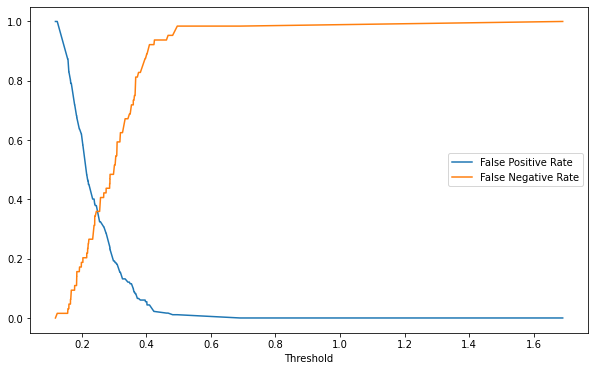

In [90]:
# prediction probability and roc
predtst = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, predtst)
dfplot = pd.DataFrame({"Threshold": thresholds, "False Positive Rate": fpr, "False Negative Rate": 1.-tpr})
ax = dfplot.plot(x='Threshold', y=["False Positive Rate", "False Negative Rate"],figsize=(10,6))
ax

In [93]:
# change threshold, 1, 0
predtst_tuned_thresh = np.where(predtst >= 0.27, 1, 0)
conf_matrix(y_test, predtst_tuned_thresh)

,Pred 0 (Not Qualified),Pred 1 (Qualified)
True 0 (Not Qualified),TN = 128 (TNR= 70.33%),FP = 54 (FPR=29.67%)
True 1 (Qualified),FN = 27 (FNR=42.19%),TP = 37 (TPR=57.81%)


In [ ]:
# evaluate scores
scores(y_test, predtst_tuned_thresh)

Accuracy:  0.45934959349593496
F1 Score:  0.38709677419354843
Precision Score:  0.2485207100591716
Recall Score:  0.875


In [ ]:
# import libraries for cross_validation and hyperparameter tuning
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV

In [ ]:
# make f1 score metric
f1 = make_scorer(recall_score, average="macro")

In [ ]:
# hyperparameter tuning and selection
# model identification
model = LogisticRegression()
# list of hyperparameter values
solvers = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
penaldo = ["l2"]
c_values = [100, 10, 1.0, 0.1, 0.01]
maxing = [100, 1000]
# place lists in dictionary
grid = dict(solver=solvers, penalty=penaldo, C=c_values, max_iter=maxing)
# Cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Grid Search
grid_search = RandomizedSearchCV(model, grid, n_jobs=-1, cv=cv, scoring=f1)
# fit to model
grid_result = grid_search.fit(X_train, y_train)
# showcase output
print("Resut from Random Search")
print("\n The best estimator: \n", grid_result.best_estimator_)
print("\n The best score is: \n", grid_result.best_score_)
print("\n The best params is: \n", grid_result.best_params_)

Resut from Random Search

 The best estimator: 
 LogisticRegression(C=100, max_iter=1000, solver='sag')

 The best score is: 
 0.5216655934121688

 The best params is: 
 {'solver': 'sag', 'penalty': 'l2', 'max_iter': 1000, 'C': 100}


HYPERPARAMETER TUNED LOGISTIC REGRESSION MODEL

In [ ]:
# place hyperparameters in a variable
logistic_hype = grid_result.best_params_

In [ ]:
# # train the data
log_reg = LogisticRegression(**logistic_hype)
log_reg.fit(X_train, y_train)

LogisticRegression(C=100, max_iter=1000, solver='sag')

In [ ]:
# predicting
y_predict = log_reg.predict(X_test)

In [ ]:
# scores
scores(y_test, y_predict)

Accuracy:  0.7764227642276422
F1 Score:  0.12698412698412698
Precision Score:  0.26666666666666666
Recall Score:  0.08333333333333333


In [ ]:
# confusion matrix
conf_matrix(y_test, y_predict)

,Pred 0 (Not Qualified),Pred 1 (Qualified)
True 0 (Not Qualified),TN = 187 (TNR= 94.44%),FP = 11 (FPR=5.56%)
True 1 (Qualified),FN = 44 (FNR=91.67%),TP = 4 (TPR=8.33%)


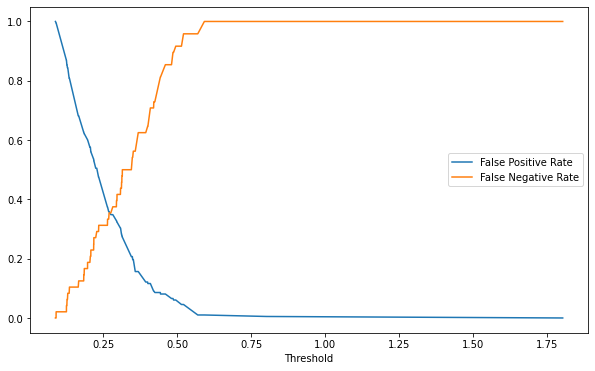

In [ ]:
# prediction probability and roc
predtst = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, predtst)
dfplot = pd.DataFrame({"Threshold": thresholds, "False Positive Rate": fpr, "False Negative Rate": 1.-tpr})
ax = dfplot.plot(x='Threshold', y=["False Positive Rate", "False Negative Rate"],figsize=(10,6))
ax

In [ ]:
# change threshold, 1, 0
predtst_tuned_thresh = np.where(predtst >= 0.19, 1, 0)
conf_matrix(y_test, predtst_tuned_thresh)

,Pred 0 (Not Qualified),Pred 1 (Qualified)
True 0 (Not Qualified),TN = 76 (TNR= 38.38%),FP = 122 (FPR=61.62%)
True 1 (Qualified),FN = 8 (FNR=16.67%),TP = 40 (TPR=83.33%)


In [ ]:
# evaluate scores
scores(y_test, predtst_tuned_thresh)

Accuracy:  0.4715447154471545
F1 Score:  0.380952380952381
Precision Score:  0.24691358024691357
Recall Score:  0.8333333333333334


In [ ]:
'''# place class probabilities in a list
prob_classy = list(log_reg.predict_proba(X_test)[:,1])
# sort values from largest to smallest
prob_classy.sort(reverse=True)
# convert from list to numpy array
arrclass = np.array(prob_classy)
# place into class
predClassy = np.where(arrclass >= 0.55, 1, 0)
print(predClassy)
print(type(predClassy))'''

'# place class probabilities in a list\nprob_classy = list(log_reg.predict_proba(X_test)[:,1])\n# sort values from largest to smallest\nprob_classy.sort(reverse=True)\n# convert from list to numpy array\narrclass = np.array(prob_classy)\n# place into class\npredClassy = np.where(arrclass >= 0.55, 1, 0)\nprint(predClassy)\nprint(type(predClassy))'

**ROC AUC CURVE**

In [ ]:
# importing libraries
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
# # train the data
log_reg = LogisticRegression(**logistic_hype)
log_reg.fit(X_train, y_train)

LogisticRegression(C=100, max_iter=1000, solver='sag')

In [ ]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = log_reg.predict_proba(X_test)
# keep probabilities for positive outcomes only
lr_probs = lr_probs[:, 1]
 

In [ ]:
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [ ]:
# summarize scores
print("No skill: ROC AUC= %.3f" %(ns_auc))
print("Logistic: ROC AUC= %.3f" %(lr_auc))

No skill: ROC AUC= 0.500
Logistic: ROC AUC= 0.679


##**RANDOM FOREST CLASSIFIER**

In [ ]:
# libraries for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# PLACE MODEL
rf = RandomForestClassifier()
# train model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# predict values 
rf_y = rf.predict(X_test)


In [ ]:
# evaluate scores
scores(y_test, rf_y)

Accuracy:  0.7439024390243902
F1 Score:  0.27586206896551724
Precision Score:  0.5454545454545454
Recall Score:  0.18461538461538463


In [ ]:
# confusion matrix
conf_matrix(y_test, rf_y)

,Pred 0 (Not Qualified),Pred 1 (Qualified)
True 0 (Not Qualified),TN = 171 (TNR= 94.48%),FP = 10 (FPR=5.52%)
True 1 (Qualified),FN = 53 (FNR=81.54%),TP = 12 (TPR=18.46%)


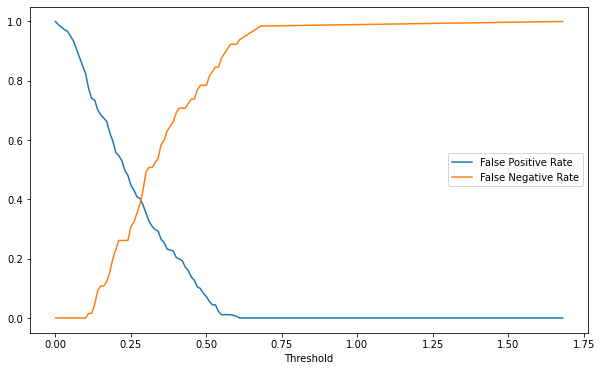

In [ ]:
# prediction probability and roc
predtst = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, predtst)
dfplot = pd.DataFrame({"Threshold": thresholds, "False Positive Rate": fpr, "False Negative Rate": 1.-tpr})
ax = dfplot.plot(x='Threshold', y=["False Positive Rate", "False Negative Rate"],figsize=(10,6))
ax

In [ ]:
# change threshold 
predtst_tuned_rf = np.where(predtst >= 0.21, 1, 0)
conf_matrix(y_test, predtst_tuned_rf)

,Pred 0 (Not Qualified),Pred 1 (Qualified)
True 0 (Not Qualified),TN = 82 (TNR= 45.30%),FP = 99 (FPR=54.70%)
True 1 (Qualified),FN = 17 (FNR=26.15%),TP = 48 (TPR=73.85%)


In [ ]:
# evaluate scores
scores(y_test, predtst_tuned_rf)

Accuracy:  0.5284552845528455
F1 Score:  0.4528301886792453
Precision Score:  0.32653061224489793
Recall Score:  0.7384615384615385


In [ ]:
# make recall score metric
f1 = make_scorer(recall_score, average="macro")

In [ ]:
# dictionary with hyperparameters values
random = dict(
    n_estimators= [int(x) for x in np.linspace(start= 10, stop= 150, num= 15)],
    max_features = ["auto", "sqrt", "log2"],
    max_depth = [int(x) for x in np.linspace(10, 220, num= 11)],
    min_samples_split = [i for i  in range(2, 10)],
    min_samples_leaf = [i for i in range(1, 10)])
# Cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Grid Search
grid_search = RandomizedSearchCV(rf, random, n_jobs=-1, cv=cv, scoring=f1)
# fit to model
grid_result = grid_search.fit(X_train, y_train)
# showcase output
print("Resut from Random Search")
print("\n The best estimator: \n", grid_result.best_estimator_)
print("\n The best score is: \n", grid_result.best_score_)
print("\n The best params is: \n", grid_result.best_params_)

Resut from Random Search

 The best estimator: 
 RandomForestClassifier(max_depth=94, max_features='sqrt', min_samples_split=6,
                       n_estimators=130)

 The best score is: 
 0.5461974577317044

 The best params is: 
 {'n_estimators': 130, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 94}


In [ ]:
# place hyperparameters in a variable
hyper = grid_result.best_params_
print(type(hyper))

<class 'dict'>


In [ ]:
# PLACE A HYPERPARAMETER TUNED MODEL 
rf = RandomForestClassifier(**hyper)
# train model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=94, max_features='sqrt', min_samples_split=6,
                       n_estimators=130)

In [ ]:
# predict values 
ensemble_y = rf.predict(X_test)


In [ ]:
# evaluate scores
scores(y_test, ensemble_y)

Accuracy:  0.7439024390243902
F1 Score:  0.2588235294117647
Precision Score:  0.55
Recall Score:  0.16923076923076924


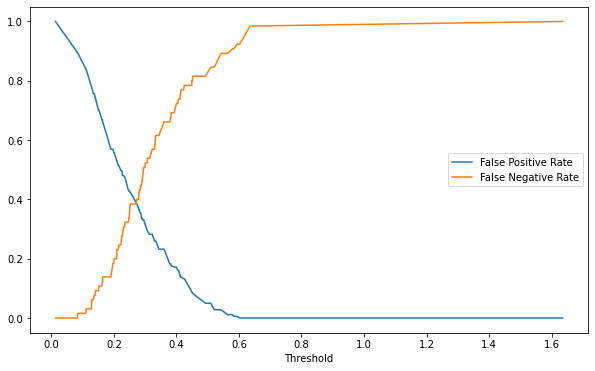

In [ ]:
# prediction probability and roc
predtst = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, predtst)
dfplot = pd.DataFrame({"Threshold": thresholds, "False Positive Rate": fpr, "False Negative Rate": 1.-tpr})
ax = dfplot.plot(x='Threshold', y=["False Positive Rate", "False Negative Rate"],figsize=(10,6))
ax

In [ ]:
# change threshold 
predtst_tuned_rf = np.where(predtst >= 0.2, 1, 0)
conf_matrix(y_test, predtst_tuned_rf)

,Pred 0 (Not Qualified),Pred 1 (Qualified)
True 0 (Not Qualified),TN = 80 (TNR= 44.20%),FP = 101 (FPR=55.80%)
True 1 (Qualified),FN = 13 (FNR=20.00%),TP = 52 (TPR=80.00%)


In [ ]:
# evaluate scores
scores(y_test, predtst_tuned_rf)

Accuracy:  0.5365853658536586
F1 Score:  0.4770642201834863
Precision Score:  0.33986928104575165
Recall Score:  0.8


## HistGradientBoosting

In [ ]:
# import libraries
# explicitly rquire this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting
# model library
from sklearn.ensemble import HistGradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [ ]:
# define model
HistGradient = HistGradientBoostingClassifier()
# train the model
HistGradient.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [ ]:
# Predict from X_test
histy = HistGradient.predict(X_test)

In [ ]:
# scores of HistGradientBoostingClassifier
scores(y_test, histy)

Accuracy:  0.7154471544715447
F1 Score:  0.3
Precision Score:  0.42857142857142855
Recall Score:  0.23076923076923078


In [ ]:
# confusion matrix of HistGradientBoosting Classifier
conf_matrix(y_test, histy)

,Pred 0 (Not Qualified),Pred 1 (Qualified)
True 0 (Not Qualified),TN = 161 (TNR= 88.95%),FP = 20 (FPR=11.05%)
True 1 (Qualified),FN = 50 (FNR=76.92%),TP = 15 (TPR=23.08%)


In [ ]:
# dictionary with hyperparameters values
random = dict(
    learning_rate = [100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.001, 0.0001],
    max_iter = [int(x) for x in np.linspace(start=50, stop=350, num=12)],
    max_leaf_nodes = [i for i in range(10, 80, 10)],
    max_depth = [int(x) for x in np.linspace(5, 220, num=11)],
    min_samples_leaf = [i for i in range(1, 30, 2)],
    l2_regularization = [0.16, 0.12, 0.08, 0.04, 0, 1.4, 1.8, 2.2, 2.6],
    max_bins = [i for i in range(50, 250, 25)]
)
# Cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Grid Search
grid_search = RandomizedSearchCV(HistGradient, random, n_jobs=-1, cv=cv, scoring=f1)
# fit to model
grid_result = grid_search.fit(X_train, y_train)
# showcase output
print("Resut from Random Search")
print("\n The best estimator: \n", grid_result.best_estimator_)
print("\n The best score is: \n", grid_result.best_score_)
print("\n The best params is: \n", grid_result.best_params_)

HYPERPARAMETER TUNED MODEL

In [ ]:
# create tuned model
HistGrad = HistGradientBoostingClassifier(**grid_result.best_params_)
# train model
HistGrad.fit(X_train, y_train)

HistGradientBoostingClassifier(l2_regularization=2.2, max_bins=175,
                               max_depth=134, max_iter=131, max_leaf_nodes=70,
                               min_samples_leaf=3)

In [ ]:
# Predict from X_test
grady = HistGrad.predict(X_test)

In [ ]:
# scores of HistGradientBoostingClassifier
scores(y_test, grady)

Accuracy:  0.6991869918699187
F1 Score:  0.2884615384615385
Precision Score:  0.38461538461538464
Recall Score:  0.23076923076923078


In [ ]:
# confusion matrix of HistGradientBoosting Classifier
conf_matrix(y_test, grady)

,Pred 0 (Not Qualified),Pred 1 (Qualified)
True 0 (Not Qualified),TN = 157 (TNR= 86.74%),FP = 24 (FPR=13.26%)
True 1 (Qualified),FN = 50 (FNR=76.92%),TP = 15 (TPR=23.08%)


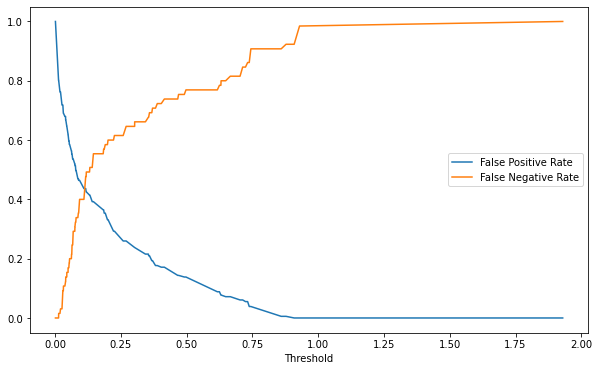

In [ ]:
# prediction probability and roc
predtst = HistGrad.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, predtst)
dfplot = pd.DataFrame({"Threshold": thresholds, "False Positive Rate": fpr, "False Negative Rate": 1.-tpr})
ax = dfplot.plot(x='Threshold', y=["False Positive Rate", "False Negative Rate"],figsize=(10,6))
ax

In [ ]:
# change threshold 
predtst_tuned_hg = np.where(predtst >= 0.06, 1, 0)
conf_matrix(y_test, predtst_tuned_hg)

,Pred 0 (Not Qualified),Pred 1 (Qualified)
True 0 (Not Qualified),TN = 79 (TNR= 43.65%),FP = 102 (FPR=56.35%)
True 1 (Qualified),FN = 13 (FNR=20.00%),TP = 52 (TPR=80.00%)


In [ ]:
# evaluate scores
scores(y_test, predtst_tuned_hg)

Accuracy:  0.532520325203252
F1 Score:  0.4748858447488584
Precision Score:  0.33766233766233766
Recall Score:  0.8


## CATBOOST CLASSIFIER

In [ ]:
# install package
! pip install catboost
# import libraries
from catboost import CatBoostClassifier

     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [ ]:
# create catboost classifier
clf = CatBoostClassifier()
# train model
clf.fit(X_train, y_train)

Learning rate set to 0.010227
0:	learn: 0.6891990	total: 47.5ms	remaining: 47.5s
1:	learn: 0.6854978	total: 48.6ms	remaining: 24.2s
2:	learn: 0.6814212	total: 50.5ms	remaining: 16.8s
3:	learn: 0.6781264	total: 52.2ms	remaining: 13s
4:	learn: 0.6747813	total: 53.8ms	remaining: 10.7s
5:	learn: 0.6714941	total: 55.3ms	remaining: 9.17s
6:	learn: 0.6681959	total: 56.9ms	remaining: 8.07s
7:	learn: 0.6652861	total: 58.5ms	remaining: 7.25s
8:	learn: 0.6629480	total: 60.1ms	remaining: 6.62s
9:	learn: 0.6598229	total: 61.7ms	remaining: 6.11s
10:	learn: 0.6569477	total: 65.5ms	remaining: 5.89s
11:	learn: 0.6538341	total: 66.7ms	remaining: 5.49s
12:	learn: 0.6513650	total: 67.5ms	remaining: 5.12s
13:	learn: 0.6488322	total: 68.7ms	remaining: 4.84s
14:	learn: 0.6457885	total: 69.8ms	remaining: 4.58s
15:	learn: 0.6431779	total: 71ms	remaining: 4.36s
16:	learn: 0.6399096	total: 72.2ms	remaining: 4.17s
17:	learn: 0.6374024	total: 73.4ms	remaining: 4s
18:	learn: 0.6346433	total: 74.6ms	remaining: 3.85s

In [ ]:
# predict values
caty = clf.predict(X_test)

In [ ]:
# scores of CatBoostClassifier
scores(y_test, caty)

Accuracy:  0.8211382113821138
F1 Score:  0.35294117647058826
Precision Score:  0.6
Recall Score:  0.25


In [ ]:
# confusion matrix of CatBoostClassifier
conf_matrix(y_test, caty)

,Pred 0 (Not Qualified),Pred 1 (Qualified)
True 0 (Not Qualified),TN = 190 (TNR= 95.96%),FP = 8 (FPR=4.04%)
True 1 (Qualified),FN = 36 (FNR=75.00%),TP = 12 (TPR=25.00%)


**TUNING CATBOOST**

In [ ]:
# installing packages
! pip install scikit-optimize 
! pip install shap

     |████████████████████████████████| 100 kB 3.4 MB/s 
     |████████████████████████████████| 564 kB 4.9 MB/s 


In [ ]:
import shap

In [ ]:
# importing libraries
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import catboost
import catboost.datasets
from skopt import gp_minimize
from skopt.utils import use_named_args
from skopt.plots import plot_convergence
from copy import deepcopy
import pprint
import shap
import time
from skopt.space import Real, Integer
pp = pprint.PrettyPrinter(indent=4)

In [ ]:
params_space = [Real(0.01, 0.8, name="learning_rate"),
                Integer(2,10,name="max_depth"),
                Real(0.5,1.0,name="colsample_bylevel"),
                Real(1.0,16.0,name="scale_pos-weight"),
                Real(0.0,100,name='bagging_temperature'),
                Real(0.0,100,name='random_strength'),
                Real(0.0,100,name='reg_lambda')]

In [ ]:
# model optimizer
class ModelOptimizer:
  best_score = None
  opt = None
  def __init__(self,model,X_train,y_train,categorical_columns_indices=None,
               n_fold=3,seed=2405,early_stopping_rounds=30,is_stratified=True,
               is_shuffle=True):
    self.model = model
    self.X_train = X_train
    self.y_train = y_train
    self.categorical_columns_indices = categorical_columns_indices
    self.n_fold = n_fold
    self.seed = seed
    self.early_stopping_rounds = early_stopping_rounds
    self.is_stratified = is_stratified
    self.is_shuffle = is_shuffle
  def update_model(self, **kwargs):
    for k, v in kwargs.items():
      setattr(self.model, k, v)
  def evaluate_model(self):
    pass
  def optimize(self, param_space, max_evals=10, n_random_starts=2):
    start_time = time.time()
    @use_named_args(params_space)
    def _minimize (**params):
      self.model.set_params(**params)
      return self.evaluate_model()
    opt = gp_minimize(_minimize, param_space, n_calls=max_evals, n_random_starts=n_random_starts,
                      random_state=2405,n_jobs=-1)
    best_values = opt.x
    optimal_values = dict(zip([param.name for param in param_space],best_values))
    best_score = opt.fun
    self.best_score = best_score
    self.opt = opt
    print("optimal parameters: {}\noptimal score:{}\noptimization time:{}"
    .format(optimal_values, best_score, time.time() - start.time))
    print("Updating model with optimal values")
    self.update_model(**optimal_values)
    plot_convergence(opt)
    return optimal_values
# CatBoostOptimizer
class CatBoostOptimizer(ModelOptimizer):
  def evaluate_model(self):
    validate_scores = catboost.cv(catboost.Pool(self.X_train, self.y_train,
                                                cat_features=self.categorical_columns_indices),
                                  self.model.get_params(),
                                  nfold= self.n_fold,
                                  stratified= self.is_stratified,
                                  seed = self.seed,
                                  early_stopping_rounds= self.early_stopping_rounds,
                                  shuffle= self.is_shuffle,
                                  #metrics = "recall",
                                  plot=False)
    self.scores = validate_scores
    test_scores = validate_scores.iloc[:,2]
    best_metric = test_scores.max()
    return 1 - best_metric

In [ ]:
# catboost default params
default_cb = catboost.CatBoostClassifier(loss_function='Logloss', eval_metric="AUC", silent=True)
default_cb_optimizer = CatBoostOptimizer(default_cb, X_train, y_train)
print(default_cb_optimizer)